In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import os
from scipy.ndimage import gaussian_filter
import time

# Import the MFI library 
import MFI_lib2D as lib2
import MFI_class2D

# Set the path to the notebook and the data folder (and figures folder if needed)
if 'path_notebook' not in globals(): path_notebook = os.getcwd()
print("The path to the notebook is:", path_notebook)

if 'path_data' not in globals():
    if not os.path.isdir("_data_PRTR"): print("\nThe data folder \"_data_PRTR\" does not exist. Creating new folder."); os.mkdir(path_notebook + "/_data_PRTR/"); 
    path_data = path_notebook + "/_data_PRTR/"
print("The data folder is:", path_data)
# path_figures = "/home/ucecabj/Pictures/MFI_figures/"

# Set the plotting parameters
for _plt_parameters_ in [0]:
    from matplotlib import rc
    plt.rcParams.update({ "text.usetex": True, "font.family": "serif", "font.serif": ["Helvetica"], "font.size": 12, "axes.titleweight": "bold"})
    plw = 0.6  # width of (box line, tick line, ...)
    plt.rcParams.update({"axes.linewidth": plw, "figure.figsize": (4,3)}) 
    plt.rcParams.update({"xtick.top": True, "xtick.direction": "in", "xtick.major.width": plw, "xtick.minor.width": plw, "xtick.minor.visible": True, "xtick.major.size": 5})
    plt.rcParams.update({"ytick.right": True, "ytick.direction": "in", "ytick.major.width": plw, "ytick.minor.width": plw, "ytick.minor.visible": True, "ytick.major.size": 5})

t_compare, aofe_compare, _, aad_compare, _ = lib2.load_pkl(path_notebook + f"/error_progressions/error_progression_long_inve.pkl")


The path to the notebook is: /home/ucecabj/Desktop/MFI_git/MFI_class2D
The data folder is: /home/ucecabj/Desktop/MFI_git/MFI_class2D/_data_PRTR/


## Invernizzi Potential

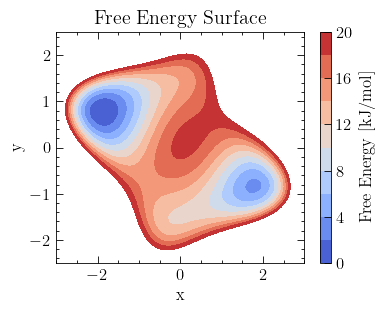

In [2]:
# Define the grid, the potential, the string of the potential and the FES cutoff
gridx = np.linspace(-3, 3, 100); 
gridy = np.linspace(-2.5, 2.5, 100); 
X, Y = np.meshgrid(gridx, gridy)
inve_pot = 1.34549*X**4+1.90211*X**3*Y+3.92705*X**2*Y**2-6.44246*X**2-1.90211*X*Y**3+5.58721*X*Y+1.33481*X+1.34549*Y**4-5.55754*Y**2+0.904586*Y+18.5598
inve_pot = inve_pot - np.min(inve_pot)
inve_pot_string = "1.34549*x^4+1.90211*x^3*y+3.92705*x^2*y^2-6.44246*x^2-1.90211*x*y^3+5.58721*x*y+1.33481*x+1.34549*y^4-5.55754*y^2+0.904586*y+18.5598"
plumed_dat_text = f"p: DISTANCE ATOMS=1,2 COMPONENTS\nff: MATHEVAL ARG=p.x,p.y FUNC=({inve_pot_string}) PERIODIC=NO\nbb: BIASVALUE ARG=ff\n"
FES_cutoff = 20

# Define plumed grid
[plX, plY, pl_min, pl_max, pl_n, pl_extra] = lib2.get_plumed_grid_2D(X, Y, [-4,-4], [4,4])

# plot the free energy surface
plt.contourf(X, Y, inve_pot, levels=np.linspace(0, FES_cutoff, 11), cmap='coolwarm'); plt.colorbar(label="Free Energy [kJ/mol]"); plt.xlabel("x"); plt.ylabel("y"); plt.title("Free Energy Surface"); plt.show()

# Stimulation path
path_invernizzi = path_data + "Invernizzi_Potential/"

### MFI2D run PRTR

In [3]:
# default parameters for the MFI class
default_params = {  "X":X, "Y":Y, "Z":inve_pot, 
                    "bw":[0.1, 0.1], "System":"Langevin", "plumed_dat_text":plumed_dat_text, 
                    "position_pace":50, "n_pos_per_window":10, "metad_pace":500, "Bias_sf":0.95, "gaus_filter_sigma":1, 
                    "FES_cutoff":FES_cutoff, "calculate_FES_st_dev":False, "bootstrap_iter":None,
                    "simulation_folder_path": path_invernizzi, "save_mfi_instance":True, "save_results":True, "save_force_terms":True, "save_error_progression":True,
                    }

In [8]:
os.chdir(path_notebook); reload(MFI_class2D); reload(lib2); pass

S 1  START in exploration phase | MetaD_H=26.53 | MetaD_W=[0.096 0.08 ] | BF=100 | Startup: 0.14 sec
S 2  START in exploration phase | MetaD_H=26.53 | MetaD_W=[0.112      0.09333333] | BF=100 | Startup: 0.14 sec
S 3  START in exploration phase | MetaD_H=26.53 | MetaD_W=[0.128      0.10666667] | BF=100 | Startup: 0.14 sec
S 4  START in exploration phase | MetaD_H=26.53 | MetaD_W=[0.144 0.12 ] | BF=100 | Startup: 0.14 sec
    S 1 | t= 0.25ns | nPos: 1000/ 1000: Aofe: 29.08 | AAD: 6.46 | Aofe_all: 29.08  |  AAD_all: 6.46 | 
    S 2 | t= 0.25ns | nPos: 1000/ 1000: Aofe: 27.88 | AAD: 8.70 | Aofe_all: 19.60  |  AAD_all: 5.18 | 
    S 3 | t= 0.25ns | nPos: 1000/ 1000: Aofe: 25.74 | AAD: 7.49 | Aofe_all: 16.66  |  AAD_all: 5.14 | 
ALL | t= 0.75ns : 
    S 4 | t= 0.25ns | nPos: 1000/ 1000: Aofe: 22.48 | AAD: 6.35 | Aofe_all: 11.79  |  AAD_all: 2.55 | 
ALL | t= 1.00ns : 
    S 1 | t= 0.50ns | nPos: 1000/ 2000: Aofe: 26.07 | AAD: 5.61 | Aofe_all: 14.27  |  AAD_all: 3.01 | 
    S 2 | t= 0.50ns | n

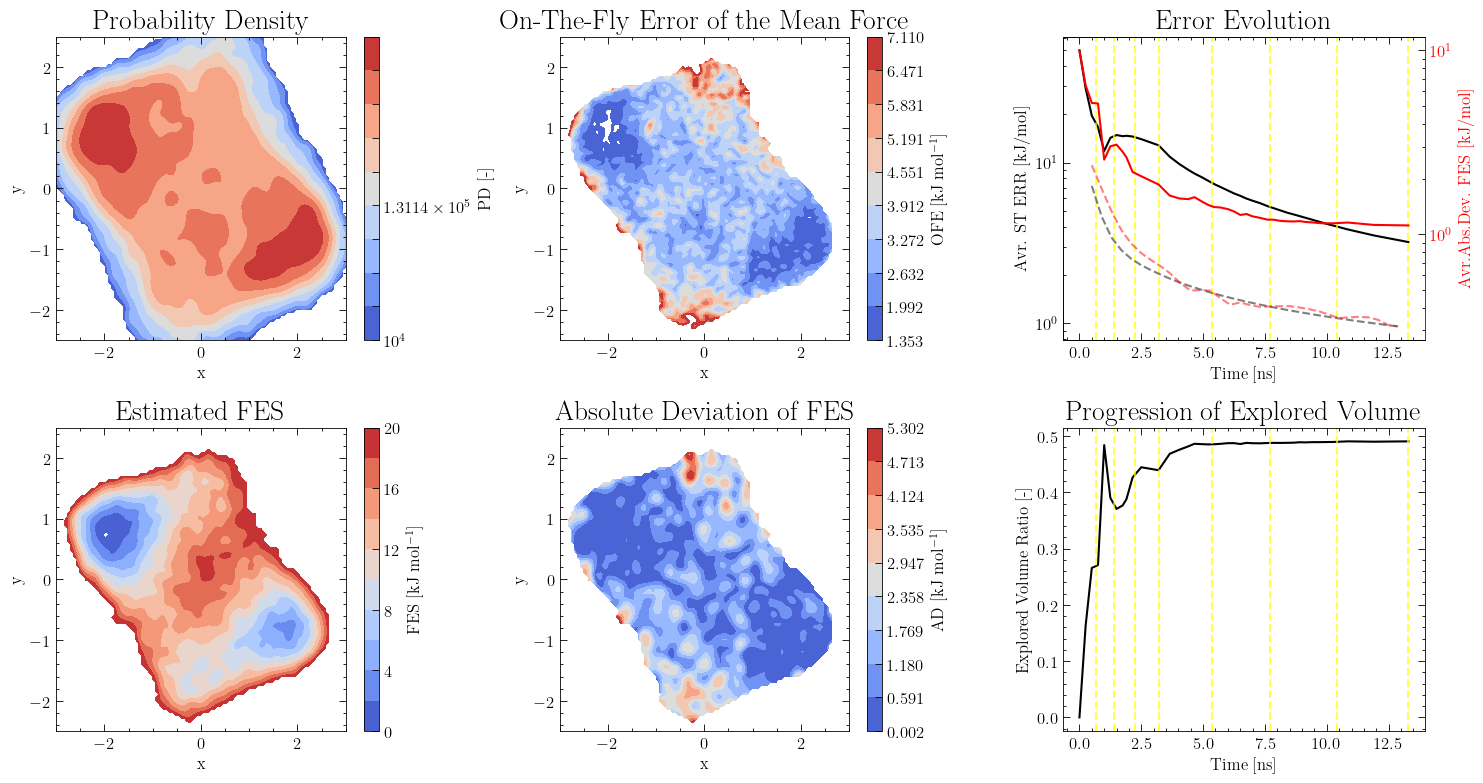

In [11]:
MFI = MFI_class2D.MFI2D(**default_params.copy())

mfi_PRTR = MFI.MFI_parallel_RTR(parent=MFI, ID="_test", workers=4, goal=0.15, main_error_type="ST_ERR", n_pos_before_analysis=1000, guaranteed_sim_time=1.0, max_sim_time=3.0, #save_comp_cost=True, 
                                workers_exploration=1, reset_forces_after="Exploration", 
                                time_budget=10.0)
                                # restart_PRTR="fast_ignore_6", time_budget=30.0)
                                # restart_PRTR="reload_fast_ignore_3")

mfi_PRTR.run()

mfi_PRTR.sim[0].plot_results(t_compare=t_compare, aofe_compare=aofe_compare, aad_compare=aad_compare)

Reloading existing SRTR Campaign
Found 12 existing simulation folders

Loading simulation folder: "simulation_test_1"  | calculating force terms from data without external bias. 

Loading simulation folder: "simulation_test_2"  | calculating force terms from data without external bias. 

Loading simulation folder: "simulation_test_3"  | calculating force terms from data without external bias. 

Loading simulation folder: "simulation_test_4"  | calculating force terms from data without external bias. 

Loading simulation folder: "simulation_test_5"  | calculating force terms from data with external bias. 

Loading simulation folder: "simulation_test_6"  | calculating force terms from data with external bias. 

Loading simulation folder: "simulation_test_7"  | calculating force terms from data with external bias. 

Loading simulation folder: "simulation_test_8"  | calculating force terms from data with external bias. 

Loading simulation folder: "simulation_test_9"  | calculating force t

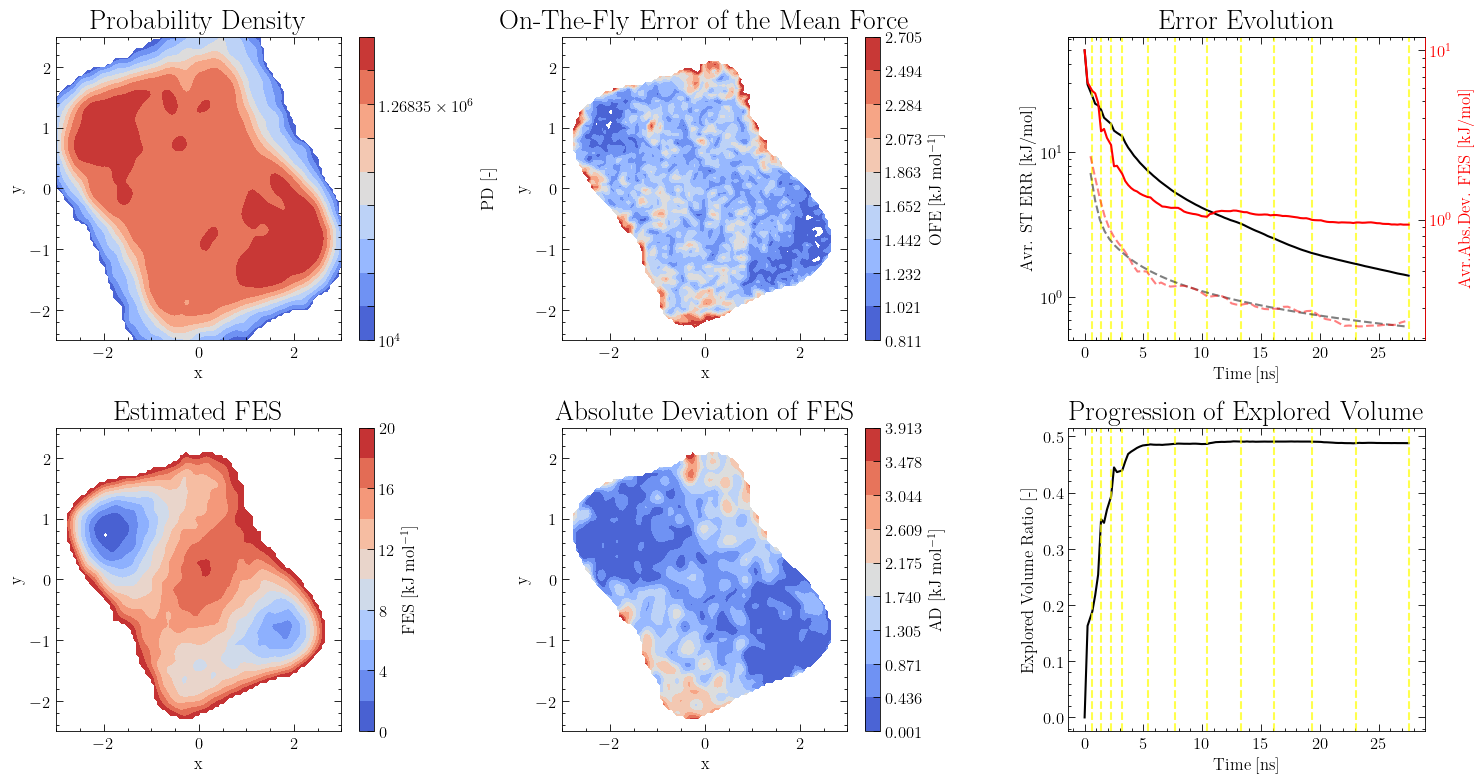

In [20]:
MFI = MFI_class2D.MFI2D(**default_params.copy())
MFI.bootstrap_iter = 50

mfi_PRTR = MFI.MFI_parallel_RTR(parent=MFI, ID="_test", workers=4, goal=0.15, main_error_type="ST_ERR", n_pos_before_analysis=1000, guaranteed_sim_time=5.0, max_sim_time=8.0, #save_comp_cost=True, 
                                # restart_PRTR="fast", time_budget=20.0)
                                # restart_PRTR="fast_ignore_7", time_budget=20.0)
                                restart_PRTR="reload_full")
                                # restart_PRTR="reload_fast_ignore_8")

mfi_PRTR.run()

mfi_PRTR.sim[0].plot_results(t_compare=t_compare, aofe_compare=aofe_compare, aad_compare=aad_compare)

In [4]:
### define modified MFI functions

# def bootstrapping_error(X, Y, force_array, n_bootstrap, base_force_array=None, periodic=[False, False], FES_cutoff=None, PD_cutoff=None, PD_limit=1E-10, use_VNORM=False, get_progression=False, print_progress=False):
    
#     # Get grid variables
#     nbins_yx = X.shape
#     min_grid = [np.min(X), np.min(Y)]
#     max_grid = [np.max(X), np.max(Y)]
    
#     # Get the correct shape of the force array (Needs to be [PD, FX, FY], but sometimes it is [PD, PD2, FX, FY, OFV_X, OFV_Y])
#     if force_array.shape[-3] == 6: force_array = force_array[:,[0,2,3]]
#     if force_array.shape[-3] != 3: raise ValueError("force_array should have shape (n_forces, 3) or (n_forces, 6)")

#     if base_force_array is not None:
#         if base_force_array.shape[-3] == 6: base_force_array = base_force_array[:,[0,2,3]]
#         if base_force_array.shape[-3] != 3: raise ValueError("base_force_array should have shape (n_forces, 3) or (n_forces, 6)")
        
#         # combine base_force_array and force_array
#         force_array = np.concatenate((force_array, base_force_array), axis=0)
        
#     # if len(force_array) > 20: 
        
#     #     block_size = int(len(force_array) // 20 + 1)
#     #     # print(f"The number of force terms ({len(force_array)}) is larger than 25. Will use blocks of {block_size} to have ", end="")
#     #     force_array = make_force_terms_blocks(force_array, block_size)
#     #     # print(f"{len(force_array)} force terms.")

#     #Define constants and initialise arrays
#     n_forces = force_array.shape[0]
#     avr_sd_fes_prog = np.zeros(n_bootstrap) if get_progression else None
#     FES_avr = np.zeros(nbins_yx)
#     M2 = np.zeros(nbins_yx)
    
#     # Find FES of the complete force array
#     [PD, Force_x, Force_y] = patch_forces(force_array)
#     FES_0 = FFT_intg_2D(Force_x, Force_y, min_grid=min_grid, max_grid=max_grid, periodic=periodic)
        
#     # find cutoff array and averaging denominator
#     cutoff = np.ones(nbins_yx)
#     if PD_cutoff is not None: cutoff = np.where(PD > PD_cutoff, cutoff, 0)
#     if FES_cutoff is not None: cutoff = np.where(FES_0 < FES_cutoff, cutoff, 0) 
#     if use_VNORM: averaging_denominator = (np.sum(cutoff)**2) /np.prod(nbins_yx)
#     else: averaging_denominator = np.sum(cutoff) 

#     for iteration in range(n_bootstrap):
            
#         #Randomly choose forward forces and backward forces and save to force array
#         np.random.seed()
#         random_sample_index = np.random.choice(n_forces, size=n_forces)      
#         force = list(force_array[random_sample_index])    
    
#         #Patch forces
#         [PD, Force_x, Force_y] = patch_forces(force)

#         #Calculate FES. if there is a FES_cutoff, find cutoff. 
#         FES = FFT_intg_2D(Force_x, Force_y, min_grid=min_grid, max_grid=max_grid, periodic=periodic)

#         # calculate standard devaition using Welford’s method
#         delta = FES - FES_avr
#         FES_avr += delta/(iteration+1)
#         delta2 = FES - FES_avr
#         M2 += delta*delta2
        
#         if iteration > 0:
#             sd_fes = np.sqrt(M2 /iteration)  # Bessel correction is usually (iteration-1) but we start from 0
            
#             if PD_cutoff is not None or FES_cutoff is not None: sd_fes *= cutoff
            
#             if get_progression or print_progress: avr_sd_fes = np.sum(sd_fes)/averaging_denominator
            
#             if get_progression: avr_sd_fes_prog[iteration] = avr_sd_fes
        
#             #print progress
#             if print_progress and (iteration+1) % (n_bootstrap/10) == 0: print(f"i={iteration+1}/{n_bootstrap} : St. dev. = {round(avr_sd_fes,3)}")    
            
#     if not get_progression and not print_progress: avr_sd_fes_prog = np.sum(sd_fes)/averaging_denominator
            
#     return FES_0, FES_avr, sd_fes, avr_sd_fes_prog
    
# def make_force_terms_blocks(force_terms, block_size):
    
#     n_blocks = int(np.ceil(len(force_terms) / block_size))
#     new_force_terms = []
#     for i in range(n_blocks):
        
#         if i == n_blocks-1: block = patch_forces(force_terms[i*block_size:])
#         else: block = patch_forces(force_terms[i*block_size:(i+1)*block_size])
#         new_force_terms.append(block)
    
#     return np.array(new_force_terms)

# def patch_forces(forces, base_forces=None, PD_limit=1E-10):
    
#         # check if forces and base_forces are lists. If they are, convert them to numpy arrays
#         if isinstance(forces, list): forces = np.array(forces)
#         if isinstance(base_forces, list): base_forces = np.array(base_forces)
        
#         # Find the length of the grid 
#         if len(np.shape(forces)) == 4: nbins_yx = np.shape(forces[0, 0])
#         elif len(np.shape(forces)) == 3: nbins_yx = np.shape(forces[0])
#         else: raise ValueError("\n *** The forces array has an unexpected shape *** \n")
        
#         if np.shape(forces)[-3] == 6:
            
#             #Initialise arrays
#             PD = np.zeros(nbins_yx)
#             PD2 = np.zeros(nbins_yx)
#             Force_x = np.zeros(nbins_yx)
#             Force_y = np.zeros(nbins_yx)
#             ofv_num_x = np.zeros(nbins_yx)
#             ofv_num_y = np.zeros(nbins_yx)
            
#             # add forces to the total
#             if len(np.shape(forces)) == 4: 
#                 for i in range(len(forces)):
#                     PD += forces[i, 0]
#                     PD2 += forces[i, 1]
#                     Force_x += np.multiply(forces[i, 2], forces[i, 0])
#                     Force_y += np.multiply(forces[i, 3], forces[i, 0])
#                     ofv_num_x += forces[i, 4]
#                     ofv_num_y += forces[i, 5]
#             elif len(np.shape(forces)) == 3: 
#                 PD += forces[0]
#                 PD2 += forces[1]
#                 Force_x += np.multiply(forces[2], forces[0])
#                 Force_y += np.multiply(forces[3], forces[0])
#                 ofv_num_x += forces[4]
#                 ofv_num_y += forces[5]
                
#             # if base_forces is not None, add base_forces to the total
#             if base_forces is not None:
#                 assert np.shape(base_forces)[-3] == 6, "The base_forces array has an unexpected shape"
#                 if len(np.shape(base_forces)) == 4:
#                     for i in range(len(base_forces)):
#                         PD += base_forces[i, 0]
#                         PD2 += base_forces[i, 1]
#                         Force_x += np.multiply(base_forces[i, 2], base_forces[i, 0])
#                         Force_y += np.multiply(base_forces[i, 3], base_forces[i, 0])
#                         ofv_num_x += base_forces[i, 4]
#                         ofv_num_y += base_forces[i, 5]
#                 elif len(np.shape(base_forces)) == 3:
#                     PD += base_forces[0]
#                     PD2 += base_forces[1]
#                     Force_x += np.multiply(base_forces[2], base_forces[0])
#                     Force_y += np.multiply(base_forces[3], base_forces[0])
#                     ofv_num_x += base_forces[4]
#                     ofv_num_y += base_forces[5]
            
#             # force is divided by the probability density
#             Force_x = np.divide(Force_x, PD, out=np.zeros_like(Force_x), where=PD>PD_limit)
#             Force_y = np.divide(Force_y, PD, out=np.zeros_like(Force_y), where=PD>PD_limit)
                    
#             return [PD, PD2, Force_x, Force_y, ofv_num_x, ofv_num_y]
        
#         elif np.shape(forces)[-3] == 3:
            
#             #Initialise arrays
#             PD = np.zeros(nbins_yx)
#             Force_x = np.zeros(nbins_yx)
#             Force_y = np.zeros(nbins_yx)
            
#             # add forces to the total
#             if len(np.shape(forces)) == 4: 
#                 for i in range(len(forces)):
#                     PD += forces[i, 0]
#                     Force_x += np.multiply(forces[i, 1], forces[i, 0])
#                     Force_y += np.multiply(forces[i, 2], forces[i, 0])
#             elif len(np.shape(forces)) == 3: 
#                 PD += forces[0]
#                 Force_x += np.multiply(forces[1], forces[0])
#                 Force_y += np.multiply(forces[2], forces[0])
                
#             # if base_forces is not None, add base_forces to the total
#             if base_forces is not None:
#                 assert np.shape(base_forces)[-3] == 3, "The base_forces array has an unexpected shape"
#                 if len(np.shape(base_forces)) == 4:
#                     for i in range(len(base_forces)):
#                         PD += base_forces[i, 0]
#                         Force_x += np.multiply(base_forces[i, 1], base_forces[i, 0])
#                         Force_y += np.multiply(base_forces[i, 2], base_forces[i, 0])
#                 elif len(np.shape(base_forces)) == 3:
#                     PD += base_forces[0]
#                     Force_x += np.multiply(base_forces[1], base_forces[0])
#                     Force_y += np.multiply(base_forces[2], base_forces[0])
            
#             # force is divided by the probability density
#             Force_x = np.divide(Force_x, PD, out=np.zeros_like(Force_x), where=PD>PD_limit)
#             Force_y = np.divide(Force_y, PD, out=np.zeros_like(Force_y), where=PD>PD_limit)
                    
#             return [PD, Force_x, Force_y]
        
#         else: raise ValueError("\n *** The forces array has an unexpected shape! np.shape(forces)[-3] should be 3 or 6. *** \n")

# def FFT_intg_2D(FX, FY, min_grid=np.array((-np.pi, -np.pi)), max_grid=np.array((np.pi, np.pi)), periodic=np.array((0,0))):
#     """2D integration of force gradient (FX, FY) to find FES using Fast Fourier Transform.

#     Args:
#         FX (array of size (nbins[1], nbins[0])): CV1 component of the Mean Force.
#         FY (array of size (nbins[1], nbins[0])): CV1 component of the Mean Force.
#         min_grid (array, optional): Lower bound of the simulation domain. Defaults to np.array((-np.pi, -np.pi)).
#         min_grid (array, optional): Upper bound of the simulation domain. Defaults to np.array((np.pi, np.pi)).
#         periodic (list or array of shape (2,))): Specifies if system is periodic. First entry sepcifies if CV1 is periodic. Second entry sepcifies if CV2 is periodic. value of 0 corresponds to non-periodic CV1. Value of 1 corresponds to periodic CV1.

#     Returns:
#         list : [X, Y, fes]\n
#         X (array of size (nbins[1], nbins[0])): CV1 grid positions\n
#         Y (array of size (nbins[1], nbins[0])): CV2 grid positions\n
#         fes (array of size (nbins[1], nbins[0])): Free Energy Surface
#     """

#     #create grid
#     nbins_yx = np.shape(FX)
#     grid_spacex = (max_grid[0] - min_grid[0]) / (nbins_yx[1] - 1)
#     grid_spacey = (max_grid[1] - min_grid[1]) / (nbins_yx[0] - 1)	

#     #If system is non-periodic, make (anti-)symmetic copies so that the system appears symmetric.
#     if periodic[0] == 0:
#         nbins_yx = np.array((nbins_yx[0], nbins_yx[1]*2))
#         FX = np.block([[-FX[:,::-1],FX]])
#         FY = np.block([[FY[:,::-1],FY]])		
#     if periodic[1] == 0:
#         nbins_yx = np.array((nbins_yx[0]*2, nbins_yx[1]))
#         FX = np.block([[FX],[FX[::-1,:]]])
#         FY = np.block([[FY],[-FY[::-1,:]]])

#     # Calculate frequency
#     freq_1dx = np.fft.fftfreq(nbins_yx[1], grid_spacex)  
#     freq_1dy = np.fft.fftfreq(nbins_yx[0], grid_spacey)
#     freq_x, freq_y = np.meshgrid(freq_1dx, freq_1dy)
#     freq_hypot = np.hypot(freq_x, freq_y)
#     freq_sq = np.where(freq_hypot != 0, freq_hypot ** 2, 1E-10)
    
#     # FFTransform and integration
#     fourier_x = (np.fft.fft2(FX) * freq_x) / (2 * np.pi * 1j * freq_sq)
#     fourier_y = (np.fft.fft2(FY) * freq_y) / (2 * np.pi * 1j * freq_sq)
#     # Reverse FFT
#     fes_x = np.real(np.fft.ifft2(fourier_x))
#     fes_y = np.real(np.fft.ifft2(fourier_y))
#     # Construct whole FES
#     fes = fes_x + fes_y
    
#     #if non-periodic, cut FES back to original domain.
#     if periodic[0] == 0: fes = fes[:,int(nbins_yx[1]/2):]
#     if periodic[1] == 0: fes = fes[:int(nbins_yx[0]/2),:]

#     fes = fes - np.min(fes)
#     return fes


In [18]:
### Calculate the errors (BS and AAD) of the FES

# n_bootstrap = 300

# FES_0, FES_avr, BS_error, _ = bootstrapping_error(X=X, Y=Y, force_array=mfi_PRTR.sim[0].forces_e_list, n_bootstrap=n_bootstrap, periodic=mfi_PRTR.sim[0].periodic, FES_cutoff=mfi_PRTR.sim[0].FES_cutoff, PD_cutoff=mfi_PRTR.sim[0].PD_cutoff, PD_limit=mfi_PRTR.sim[0].PD_limit, use_VNORM=mfi_PRTR.sim[0].use_VNORM, get_progression=False, print_progress=False)

# aBS = np.sum(BS_error) / mfi_PRTR.sim[0].space_explored
# print(f"BS error: {aBS:.3f} kJ/mol")

# FES, AD, AAD, r = MFI.calculate_AD(FES=mfi_PRTR.sim[0].FES)
# print(f"AAD of sim[0]: {AAD:.3f} kJ/mol")

# FES, AD, AAD, r = MFI.calculate_AD(FES=FES_avr)
# print(f"AAD of FES_avr: {AAD:.3f} kJ/mol")

# FES, AD, AAD, r = MFI.calculate_AD(FES=FES_0)
# print(f"AAD of FES_0: {AAD:.3f} kJ/mol")


In [65]:
### print simulation times

for i in range(len(mfi_PRTR.sim)):
    # print(np.max(mfi_PRTR.sim[i].Bias))
    print(f"{i = }: time = {mfi_PRTR.sim[i].sim_time}")
    
time_list = [mfi_PRTR.sim[i].sim_time for i in range(1, len(mfi_PRTR.sim))]

print(f"Time list: {time_list}")

i = 0: time = 23.4525
i = 1: time = 0.3
i = 2: time = 0.3
i = 3: time = 0.4
i = 4: time = 1.35
i = 5: time = 3.3
i = 6: time = 3.3
i = 7: time = 3.3
i = 8: time = 1.6
i = 9: time = 2.75
i = 10: time = 3.2025
i = 11: time = 3.65
Time list: [0.3, 0.3, 0.4, 1.35, 3.3, 3.3, 3.3, 1.6, 2.75, 3.2025, 3.65]


In [14]:
### patch and calculate AAD for varying combinations of simulations
len_min = 1
aad_collection = []

for i_start in range(1, len(mfi_PRTR.sim)):
    
    print(f"\n{i_start = }")
    aad_list = []
    
    for i_end in range(i_start+1, len(mfi_PRTR.sim)+1):
    
        force_terms_new = np.array(mfi_PRTR.sim[0].force_terms[i_start:i_end])
        if len(force_terms_new) < len_min: 
            print("***********")
            continue
        force_terms_patch = np.array(lib2.patch_forces(force_terms_new))
        FES, AD, AAD, r = MFI.calculate_AD(force_terms_tot=force_terms_patch)
        print(f"len:{len(force_terms_new)}, [{i_start}, {i_end-1}] {AAD = :.4f}")
        
        aad_list.append(AAD)
    
    aad_collection.append(aad_list)    



i_start = 1
len:1, [1, 1] AAD = 5.7689
len:2, [1, 2] AAD = 3.3237
len:3, [1, 3] AAD = 2.7608
len:4, [1, 4] AAD = 1.8647
len:5, [1, 5] AAD = 1.3618
len:6, [1, 6] AAD = 1.1762
len:7, [1, 7] AAD = 1.0409
len:8, [1, 8] AAD = 1.1173
len:9, [1, 9] AAD = 1.0668
len:10, [1, 10] AAD = 0.9973
len:11, [1, 11] AAD = 0.9632
len:12, [1, 12] AAD = 0.9356

i_start = 2
len:1, [2, 2] AAD = 5.6002
len:2, [2, 3] AAD = 3.4504
len:3, [2, 4] AAD = 2.3617
len:4, [2, 5] AAD = 1.3299
len:5, [2, 6] AAD = 1.1409
len:6, [2, 7] AAD = 1.0289
len:7, [2, 8] AAD = 1.1203
len:8, [2, 9] AAD = 1.0859
len:9, [2, 10] AAD = 1.0208
len:10, [2, 11] AAD = 0.9961
len:11, [2, 12] AAD = 0.9754

i_start = 3
len:1, [3, 3] AAD = 4.0753
len:2, [3, 4] AAD = 2.3616
len:3, [3, 5] AAD = 1.3423
len:4, [3, 6] AAD = 1.1582
len:5, [3, 7] AAD = 1.0744
len:6, [3, 8] AAD = 1.2340
len:7, [3, 9] AAD = 1.2217
len:8, [3, 10] AAD = 1.1546
len:9, [3, 11] AAD = 1.1374
len:10, [3, 12] AAD = 1.1316

i_start = 4
len:1, [4, 4] AAD = 3.6617
len:2, [4, 5] A

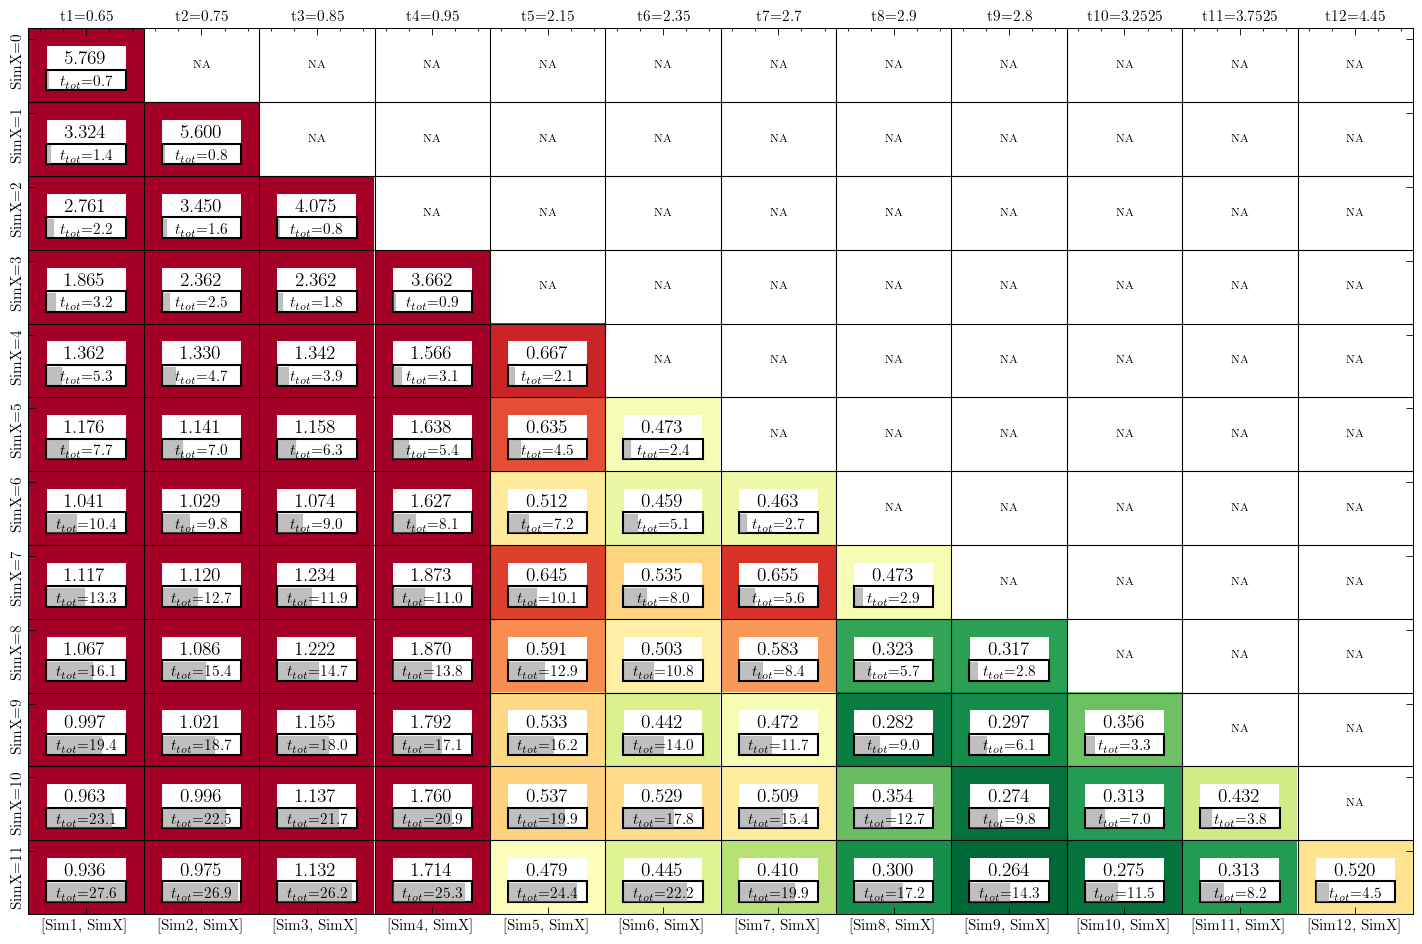

In [15]:
# print(len(aad_collection))
# print(aad_collection)

aad_collection_mod = aad_collection.copy()

### round the AAD values
for i in range(len(aad_collection_mod)):
    for j in range(len(aad_collection_mod[i])):
        aad_collection_mod[i][j] = round(aad_collection_mod[i][j], 3)
### pad the AAD values with np.nan        
for i in range(len(aad_collection_mod)):
    len_i = len(aad_collection_mod[i])
    if len_i < (len(mfi_PRTR.sim)-1): aad_collection_mod[i] = [np.nan] * (len(mfi_PRTR.sim)-1 - len_i) + aad_collection_mod[i]

# for i in range(len(aad_collection_mod)): print(len(aad_collection_mod[i]))

def plot_all_results(all_results, vmax=None, vmin=None, time_list=None):

    if vmin is None: vmin = np.nanmin(all_results)
    if vmax is None: vmax = np.nanmax(all_results)
    ncols = len(all_results)
    nrows = max(len(col) for col in all_results)
    if time_list is not None: tot_time = sum(time_list)
    
    cmap = plt.colormaps["RdYlGn_r"]
    fig, ax = plt.subplots(figsize=(ncols * 1.2, nrows * 0.8))
    for j, col in enumerate(all_results):
        for i, val in enumerate(col):
            
            if np.isnan(val): color = 'white'
            else: color = cmap((val - vmin) / (vmax - vmin))
            
            y = nrows - i - 1  # invert order to have the first value at the top
            dw, dh = 0.04, 0.08
            if not np.isnan(val): 
                if time_list is not None:
                    # plot the AAD
                    acc_time = sum(time_list[j:i+1])
                    # ax.text(j + 0.5, y + 0.5 + dh, f"{val:.3f}\n" + r"$t_{tot}$" + f"={acc_time:.1f}", ha='center', va='center', fontsize=14)
                    ax.text(j + 0.5, y + 0.5 + dh, f"{val:.3f}", ha='center', va='center', fontsize=14)

                    # plot the rectagle edge with the collor of the AAD
                    tr = np.sqrt(acc_time / tot_time)
                    rect = plt.Rectangle((j+dw*2, y+dh*1.5), 1-dw*4, 1-dh*3, edgecolor=color, facecolor="white", lw=13)
                    # rect = plt.Rectangle((j+0.5-tr/2, y+0.5-tr/2), tr, tr, facecolor=color, alpha=0.7)
                    ax.add_patch(rect)
                    
                    # plot the itme bar
                    rect = plt.Rectangle((j+dw*3.9, y+dh*2), 1-dw*7.8, dh*3.5, edgecolor="black", facecolor="white", lw=1.5)
                    ax.add_patch(rect)
                    # plot the time
                    rect = plt.Rectangle((j+dw*4.1, y+dh*2.1), (acc_time / tot_time)*(1-dw*8.2), dh*3.1, facecolor="grey", alpha=0.5, edgecolor="grey", lw=0.1)
                    ax.add_patch(rect)
                    ax.text(j + 0.5, y + 0.5 - dh*3, r"$t_{tot}$" + f"={acc_time:.1f}", ha='center', va='center', fontsize=11)
                else: 
                    ax.text(j + 0.5, y + 0.5, f"{val:.3f}", ha='center', va='center', fontsize=14)
                    # rect = plt.Rectangle((j, y), 1, 1, facecolor=color, alpha=0.5)
                    rect = plt.Rectangle((j+dw*2, y+dh*1.5), 1-dw*4, 1-dh*3, edgecolor=color, facecolor="white", lw=14)
                    ax.add_patch(rect)            
            
            else: ax.text(j + 0.5, y + 0.5, "NA", ha='center', va='center', fontsize=8)
            

                
    # Adjust the plot limits and ticks.
    ax.set_xticks(np.arange(ncols), minor=True); ax.set_yticks(np.arange(nrows), minor=True); ax.grid(which="minor", color='black')
    ax.set_xlim(0, ncols); ax.set_ylim(0, nrows)
    ax.set_xticks(np.arange(ncols) + 0.5); 
    ax.set_xticklabels([f"[Sim{i+1}, SimX]" for i in range(ncols)], fontsize=11)#, rotation=90)
    if time_list is not None:
        ax_top = ax.twiny()
        ax_top.set_xlim(ax.get_xlim())
        ax_top.set_xticks(np.arange(ncols) + 0.5)
        ax_top.set_xticklabels([f"t{i+1}={time_list[i]}" for i in range(ncols)], fontsize=11)
    
    ax.set_yticks(np.arange(nrows) + 0.85); 
    ax.set_yticklabels([f"SimX={11-i}" for i in range(nrows)], fontsize=11, rotation=90)

        
    plt.tight_layout(); plt.show()
    
plot_all_results(aad_collection_mod, vmax=0.7, time_list=[mfi_PRTR.sim[i].sim_time for i in range(1, len(mfi_PRTR.sim))])

In [38]:
a = [1,2,3, 4,5,6, 7,8,9,10]
b = [11,12,13, 14,15,16, 17,18,19,20]
c = [21,22,23, 24,25,26, 27,28,29,30]
d = [31,32,33, 34,35,36, 37,38,39,40]

aa = [a, b, c, d]

print(aa.squeze())

# print(a[3:6])

AttributeError: 'list' object has no attribute 'squeze'

In [32]:
print(mfi_PRTR.sim[0].forces_e_list.shape, "\n")

mod_forces_list = []

n_checks = 0
for i in range(1, len(mfi_PRTR.sim)):
    print(i)
    n = len(mfi_PRTR.sim[i].n_pos_analysed) -1
    mod_forces_list.append(mfi_PRTR.sim[0].forces_e_list[n_checks:n_checks+n])
    n_checks += n


(105, 6, 100, 100) 

1
2
3
4
5
6
7
8
9
10
11
12


In [ ]:
### patch and calculate AAD for varying combinations of simulations
len_min = 1
abs_collection = []

mod_forces_list = []
n_checks = 0
for i in range(1, len(mfi_PRTR.sim)):
    n = len(mfi_PRTR.sim[i].n_pos_analysed) -1
    mod_forces_list.append(mfi_PRTR.sim[0].forces_e_list[n_checks:n_checks+n])
    n_checks += n
    
# FES_0, FES_avr, BS_error, _ = bootstrapping_error(X=X, Y=Y, force_array=mfi_PRTR.sim[0].forces_e_list, n_bootstrap=n_bootstrap, periodic=mfi_PRTR.sim[0].periodic, FES_cutoff=mfi_PRTR.sim[0].FES_cutoff, PD_cutoff=mfi_PRTR.sim[0].PD_cutoff, PD_limit=mfi_PRTR.sim[0].PD_limit, use_VNORM=mfi_PRTR.sim[0].use_VNORM, get_progression=False, print_progress=False)


for i_start in range(1, len(mfi_PRTR.sim)):
    
    print(f"\n{i_start = }")
    abs_list = []
    
    for i_end in range(i_start+1, len(mfi_PRTR.sim)+1):
    
        force_terms_new = np.array(mfi_PRTR.sim[0].force_terms[i_start:i_end])
        if len(force_terms_new) < len_min: 
            print("***********")
            continue
        force_terms_patch = np.array(lib2.patch_forces(force_terms_new))
        FES, AD, AAD, r = MFI.calculate_AD(force_terms_tot=force_terms_patch)
        print(f"len:{len(force_terms_new)}, [{i_start}, {i_end-1}] {AAD = :.4f}")
        
        abs_list.append(AAD)
    
    abs_collection.append(abs_list)    


In [6]:
def plot_fffd(FX, FY, FES, AD, suptitle=None):
    
    plt.figure(figsize=(15, 4))
    
    min_f = -70#min(np.nanmin(FX), np.nanmin(FY))
    max_f = 70#max(np.nanmax(FX), np.nanmax(FY))
    
    plt.subplot(1, 4, 1)
    plt.contourf(X, Y, FX, levels=np.linspace(min_f, max_f, 21), cmap='coolwarm'); plt.colorbar(); plt.title("FX")
    plt.subplot(1, 4, 2)
    plt.contourf(X, Y, FY, levels=np.linspace(min_f, max_f, 21), cmap='coolwarm'); plt.colorbar(); plt.title("FY")
    plt.subplot(1, 4, 3)
    plt.contourf(X, Y, FES, levels=np.linspace(0, FES_cutoff, 11), cmap='coolwarm'); plt.colorbar(); plt.title("FES")
    plt.subplot(1, 4, 4)
    # max_ad = np.nanmax(AD)
    plt.contourf(X, Y, lib2.zero_to_nan(AD), levels=np.linspace(0, 2, 11), cmap='coolwarm'); plt.colorbar(); plt.title("AD")

    if suptitle is not None: plt.suptitle(suptitle)
    plt.tight_layout(); plt.show()

i_start = 7
i_end = len(mfi_PRTR.sim[0].force_terms) + 1
len_min = 2

for i_start_new in range(i_end, i_start-1, -1):
    force_terms_new = np.array(mfi_PRTR.sim[0].force_terms[i_start_new:i_end])
    if len(force_terms_new) < len_min: continue
    force_terms_patch = np.array(lib2.patch_forces(force_terms_new))
    FES, AD, AAD, r = MFI.calculate_AD(force_terms_tot=force_terms_patch)
    print(f"len:{len(force_terms_new)}, [{i_start_new}, {i_end-1}] {AAD = :.4f}")
    
    # plot_fffd(force_terms_patch[2], force_terms_patch[3], FES, AD, suptitle=f"len: {len(force_terms_new)}, [{i_start_new}, {i_end-1}] {AAD = :.4f}")#, ratio explored = {r:.4f}")
    
print("\n************************************************\n************************************************\n")

i_start = 1
i_end = len(mfi_PRTR.sim[0].force_terms) + 1 - 3
len_min = 2

for i_start_new in range(i_end, i_start-1, -1):
    force_terms_new = np.array(mfi_PRTR.sim[0].force_terms[i_start_new:i_end])
    if len(force_terms_new) < len_min: continue
    FES, AD, AAD, r = MFI.calculate_AD(force_terms_tot=lib2.patch_forces(force_terms_new))
    print(f"len:{len(force_terms_new)}, [{i_start_new}, {i_end-1}] {AAD = :.4f}")
    
    # plot_fffd(force_terms_patch[2], force_terms_patch[3], FES, AD, suptitle=f"len: {len(force_terms_new)}, [{i_start_new}, {i_end-1}] {AAD = :.4f}")#, ratio explored = {r:.4f}")

for _more_plots_ in [0]:
        
    # print("\n")

    # i_start = 3
    # i_end = 10 + 1 # len(mfi_PRTR.sim[0].force_terms) + 1
    # len_min = 3

    # for i_start_new in range(i_end, i_start-1, -1):
    #     force_terms_new = np.array(mfi_PRTR.sim[0].force_terms[i_start_new:i_start_new+3])
    #     if len(force_terms_new) < len_min: continue
    #     FES, AD, AAD = MFI.calculate_AD(force_terms_tot=lib2.patch_forces(force_terms_new))
    #     print(f"len:{len(force_terms_new)}, [{i_start_new}, {i_start_new+3-1}] {AAD = :.4f}")
        
    # print("\n")

    # i_start = 3
    # i_end = 10 + 1 # len(mfi_PRTR.sim[0].force_terms) + 1
    # len_min = 4

    # for i_start_new in range(i_end, i_start-1, -1):
    #     force_terms_new = np.array(mfi_PRTR.sim[0].force_terms[i_start_new:i_start_new+4])
    #     if len(force_terms_new) < len_min: continue
    #     FES, AD, AAD = MFI.calculate_AD(force_terms_tot=lib2.patch_forces(force_terms_new))
    #     print(f"len:{len(force_terms_new)}, [{i_start_new}, {i_start_new+4-1}] {AAD = :.4f}")
        
    # print("\n")
    
    pass


len:2, [9, 11] AAD = 0.2631
len:3, [8, 11] AAD = 0.2521
len:4, [7, 11] AAD = 0.2623

************************************************
************************************************

len:2, [7, 8] AAD = 0.3121
len:3, [6, 8] AAD = 0.3959
len:4, [5, 8] AAD = 0.5351
len:5, [4, 8] AAD = 0.5312
len:6, [3, 8] AAD = 1.5081
len:7, [2, 8] AAD = 1.0799
len:8, [1, 8] AAD = 0.9573


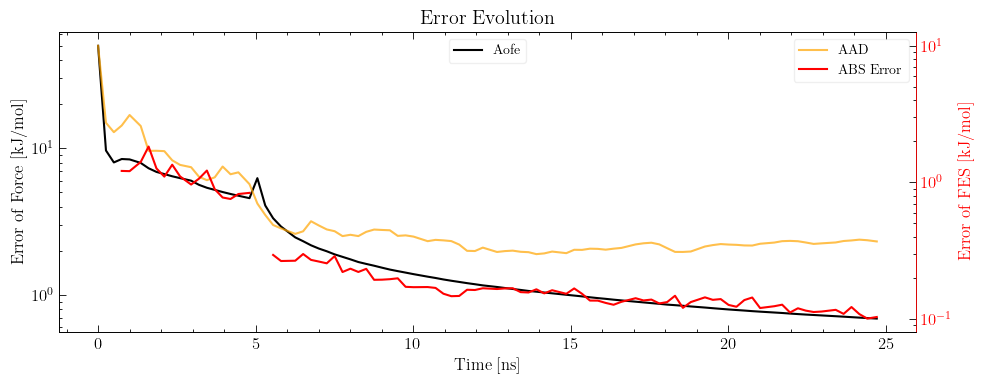

In [90]:
mfi_PRTR.sim[0].plot_errors()

In [ ]:
### Reload an existing mfi_PRTR instance
# mfi_reload = MFI_class2D.load_instance(path_invernizzi+"PRTRcampaign/MFI_instance.pkl")
# mfi_reload.sim[0].plot_results()

### Plot more error progressions

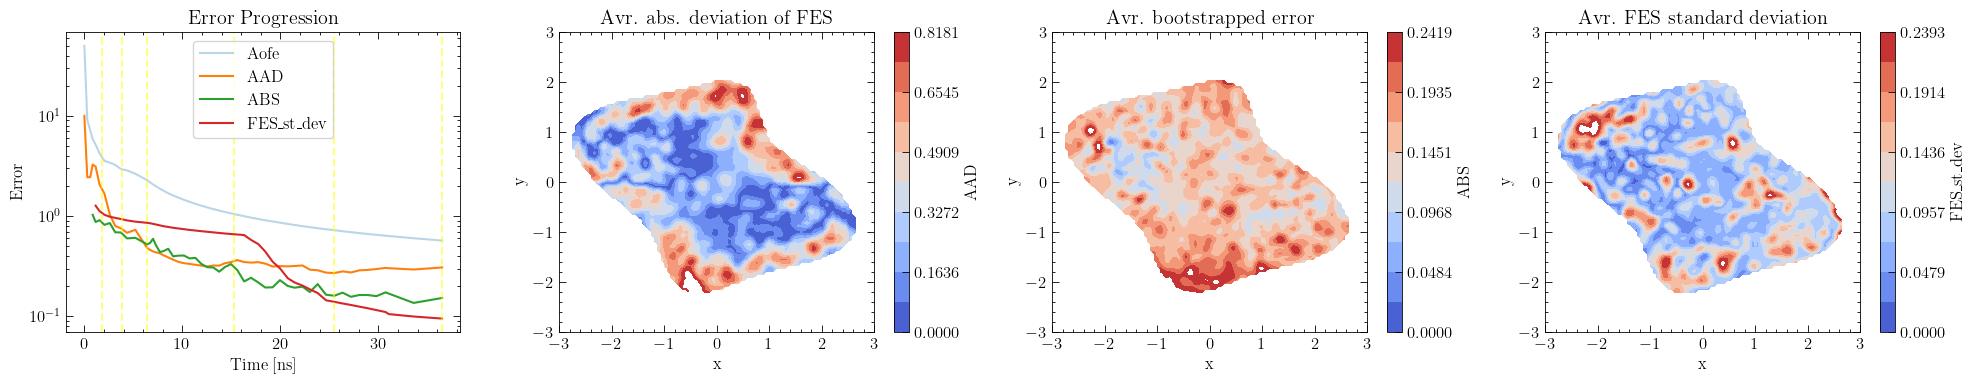

In [7]:
### Plot different error progreesions and maps    
lib2.plot_multiple_error_prog_and_maps(mfi_PRTR.sim[0], error_types=["AAD", "ABS", "FES_st_dev"])

Block size 1: sd_fes = 0.1122,  length=34


ValueError: x and y must have same first dimension, but have shapes (41,) and (34,)

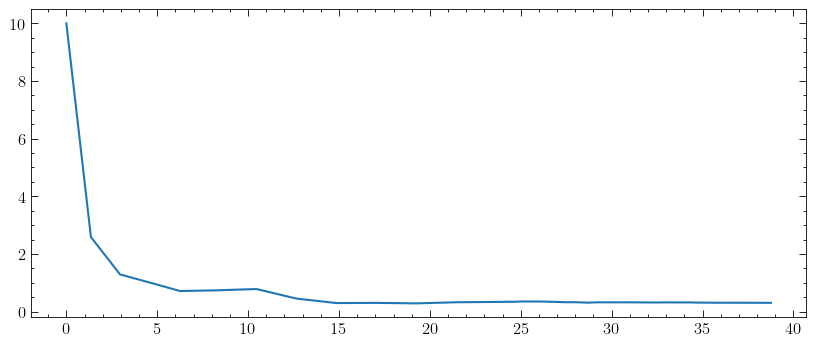

In [75]:
### bootstrap error with increasing BLOCK SIZE
n_bootstrap = 100
plt.figure(figsize=(10,4))
plt.plot(mfi_PRTR.sim[0].Avr_Error_list[:,0], mfi_PRTR.sim[0].Avr_Error_list[:,mfi_PRTR.sim[0].aad_index], label="AAD")

for block_size in [1, 3, 5]:#10]:
    _, _, _, sd_fes_evo_bs, time_bs = lib2.bootstrapping_progression(X,Y,mfi_PRTR.sim[0].forces_e_list, time_array=mfi_PRTR.sim[0].Avr_Error_list[:,0], n_bootstrap=n_bootstrap, block_size=block_size, periodic=mfi_PRTR.sim[0].periodic, FES_cutoff=mfi_PRTR.sim[0].FES_cutoff)
    print(f"Block size {block_size}: sd_fes = {sd_fes_evo_bs[-1]:.4f},  length={len(sd_fes_evo_bs)}")
    plt.plot(time_bs, sd_fes_evo_bs, label=f"ABS block_size={block_size}")

plt.ylim(0, 1); plt.title("Block size effect on ABS error"); plt.xlabel("Time [ns]"); plt.ylabel("ABS error [kJ/mol]"); plt.legend(fontsize=10); plt.show()

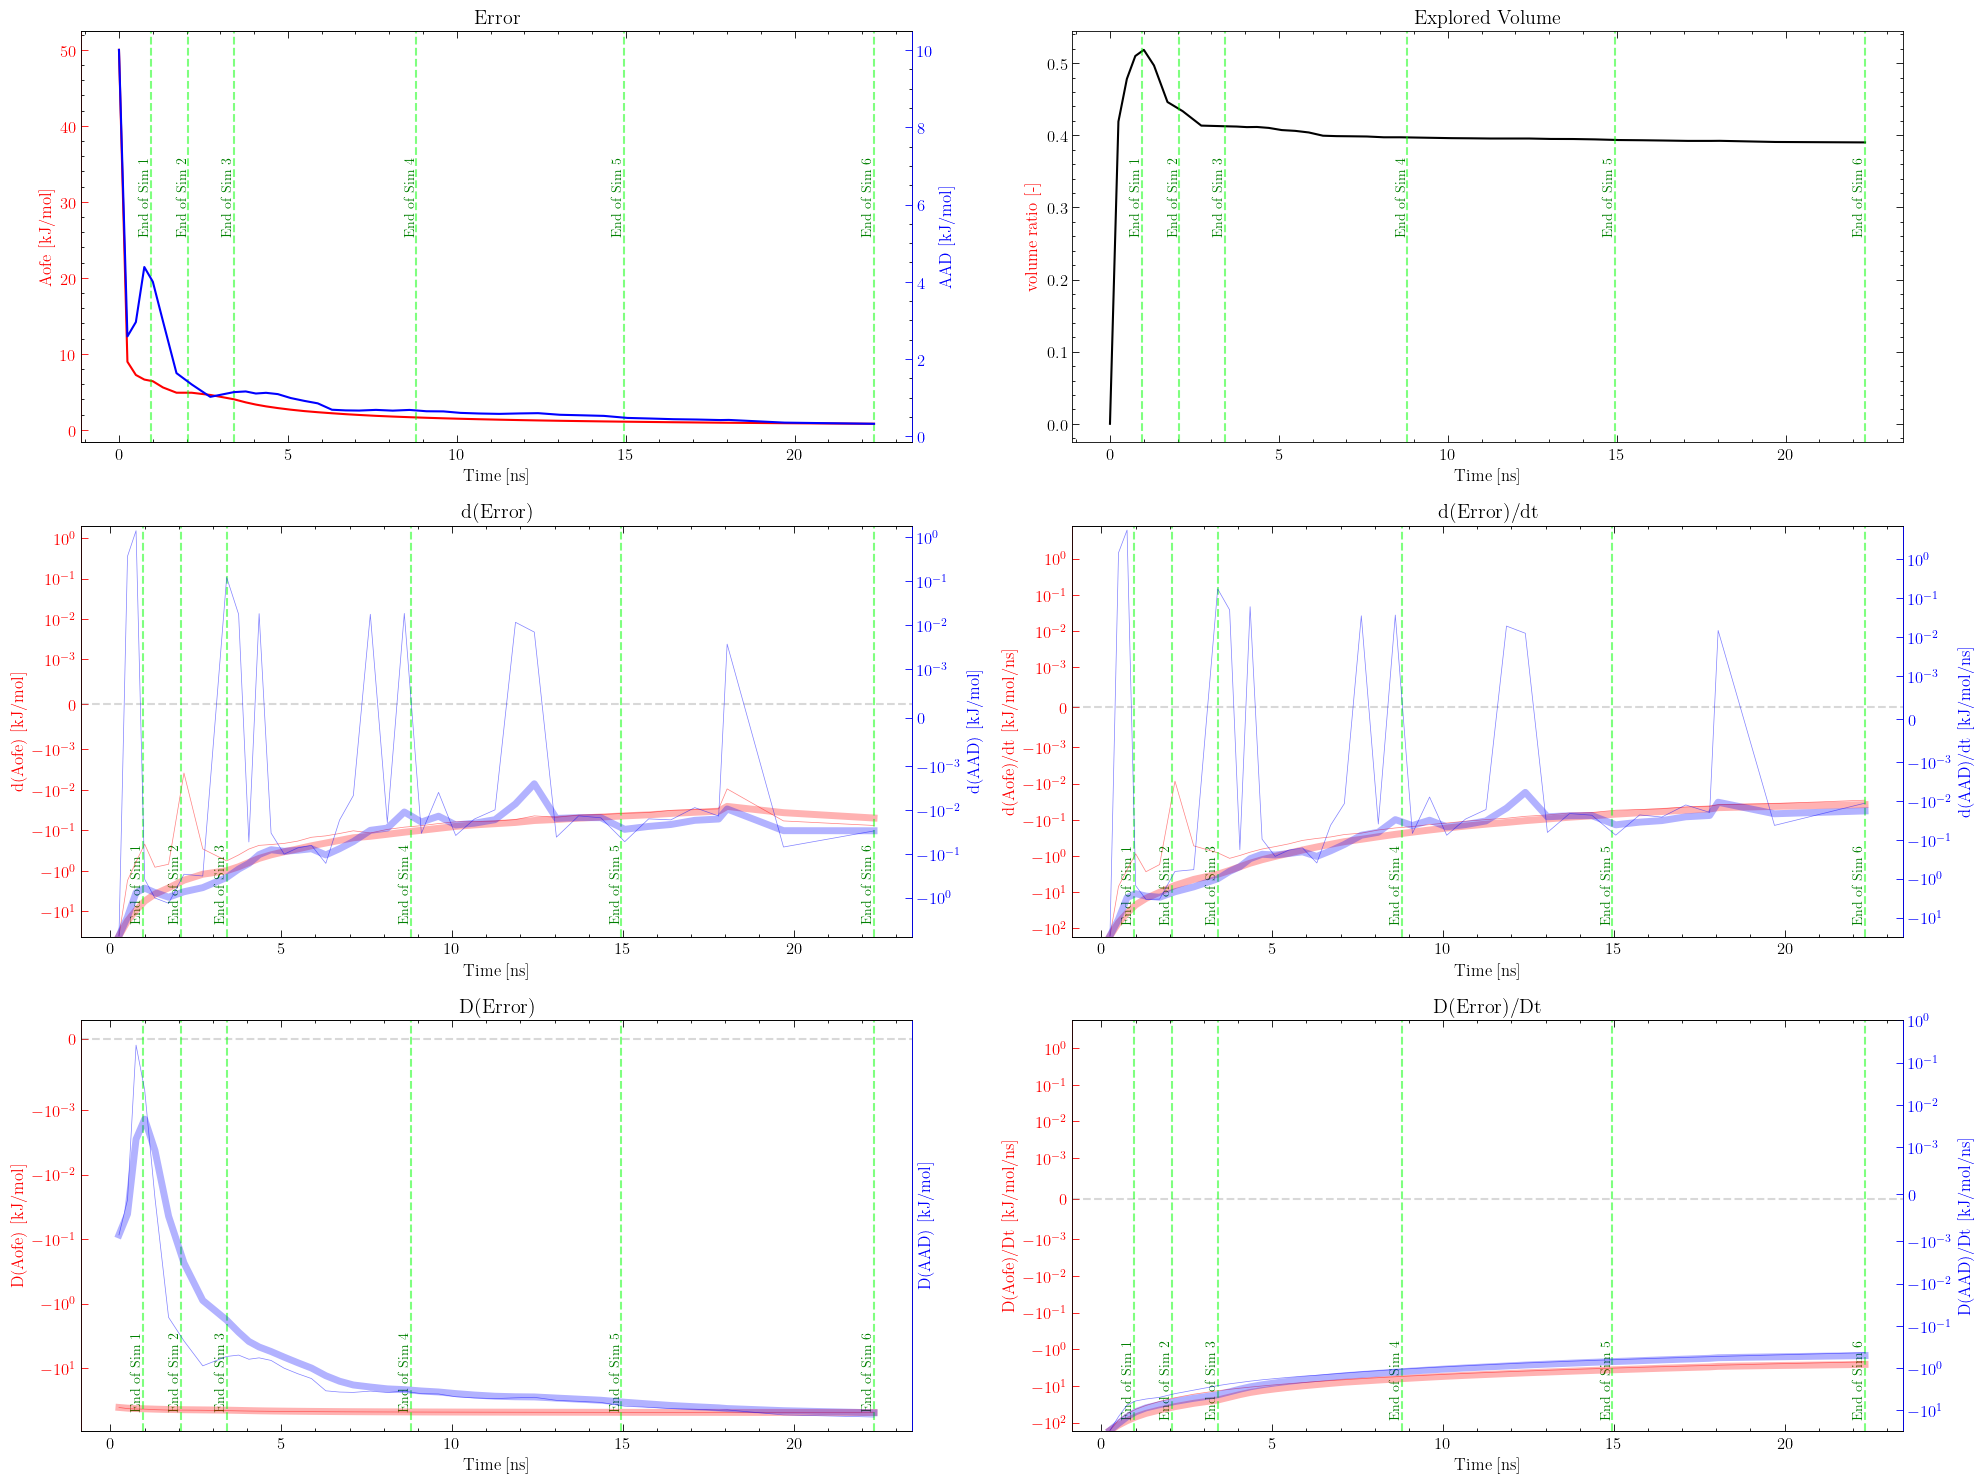

In [ ]:
#plot all Error progression    
lib2.plot_all_change_in_error(mfi_PRTR.sim[0])

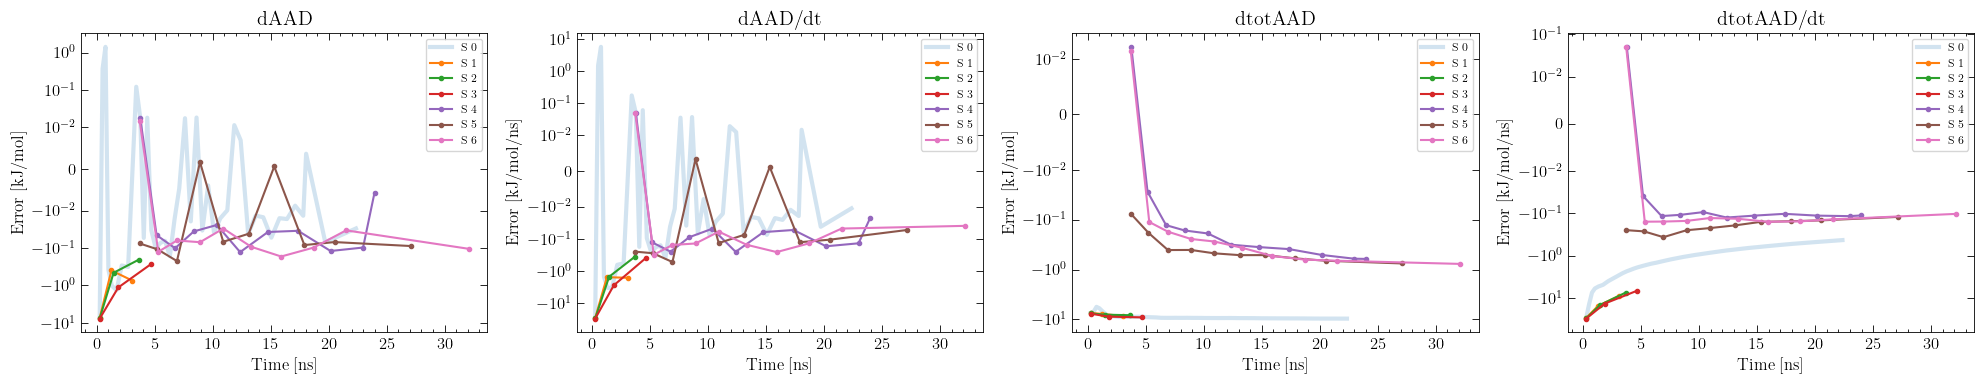

In [ ]:
# plot d_error = dAAD all: ["dAAD", "dAAD/dt", "dtotAAD", "dtotAAD/dt"]
title_list = ["dAAD", "dAAD/dt", "dtotAAD", "dtotAAD/dt"]
y_label_list = ["Error [kJ/mol]", "Error [kJ/mol/ns]", "Error [kJ/mol]", "Error [kJ/mol/ns]"]
plt.figure(figsize=(20,4))

for sim in range(len(mfi_PRTR.sim)):
    
    if len(np.array(mfi_PRTR.sim[sim].Avr_Error_list)[:,0]) < 2: print(f"SIM {sim} : len_err={len(np.array(mfi_PRTR.sim[sim].Avr_Error_list)[:,0])}"); continue
    
    for err_type in range(4):
        
        plt.subplot(1,4,err_type+1)
        plt.title(title_list[err_type]); plt.xlabel("Time [ns]"); plt.ylabel(y_label_list[err_type])
    
        if sim == 0: plt.plot(np.array(mfi_PRTR.sim[sim].Avr_Error_list)[1:,0], np.array(mfi_PRTR.sim[sim].d_AAD)[:, err_type] , label=f"S {sim}", linewidth=3, alpha=0.2)
        else: 
            t = np.array(mfi_PRTR.sim[sim].Avr_Error_list)[1:,0]
            t = [t[0] + (t[i] - t[0])*4 for i in range(len(t))]
            plt.plot(t , np.array(mfi_PRTR.sim[sim].d_AAD)[:, err_type] , label=f"S {sim}", marker=".")
            
            plt.yscale("symlog", linthresh=0.01)
 
        plt.legend(fontsize=8)

plt.tight_layout(); plt.show()

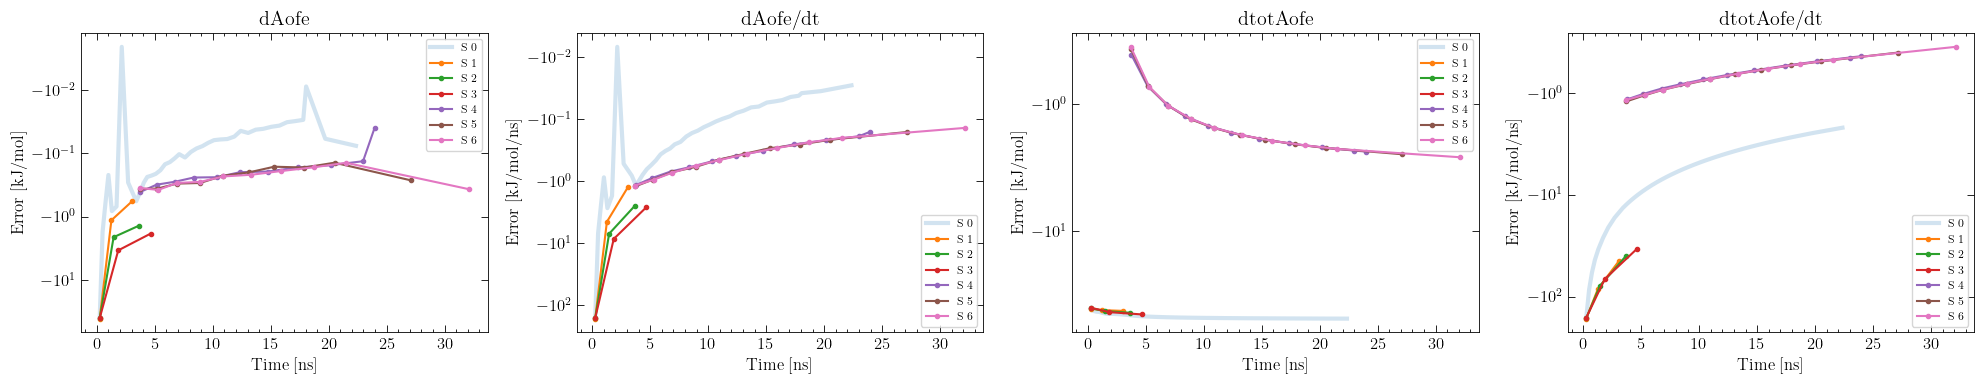

In [ ]:
# plot d_error = dAofe all:["dAofe", "dAofe/dt", "dtotAofe", "dtotAofe/dt"]
title_list = ["dAofe", "dAofe/dt", "dtotAofe", "dtotAofe/dt"]
y_label_list = ["Error [kJ/mol]", "Error [kJ/mol/ns]", "Error [kJ/mol]", "Error [kJ/mol/ns]"]
plt.figure(figsize=(20,4))

for sim in range(len(mfi_PRTR.sim)):
    
    if len(np.array(mfi_PRTR.sim[sim].Avr_Error_list)[:,0]) < 2: print(f"SIM {sim} : len_err={len(np.array(mfi_PRTR.sim[sim].Avr_Error_list)[:,0])}"); continue

    for err_type in range(4):
        
        plt.subplot(1,4,err_type+1)
        plt.title(title_list[err_type]); plt.xlabel("Time [ns]"); plt.ylabel(y_label_list[err_type])
    
        if sim == 0: plt.plot(np.array(mfi_PRTR.sim[sim].Avr_Error_list)[1:,0], np.array(mfi_PRTR.sim[sim].d_Aofe)[:, err_type] , label=f"S {sim}", linewidth=3, alpha=0.2)
        else: 
            t = np.array(mfi_PRTR.sim[sim].Avr_Error_list)[1:,0]
            t = [t[0] + (t[i] - t[0])*4 for i in range(len(t))]
            plt.plot(t , np.array(mfi_PRTR.sim[sim].d_Aofe)[:, err_type] , label=f"S {sim}", marker=".")
            
            plt.yscale("symlog", linthresh=0.01)
 
        plt.legend(fontsize=8)

plt.tight_layout(); plt.show()

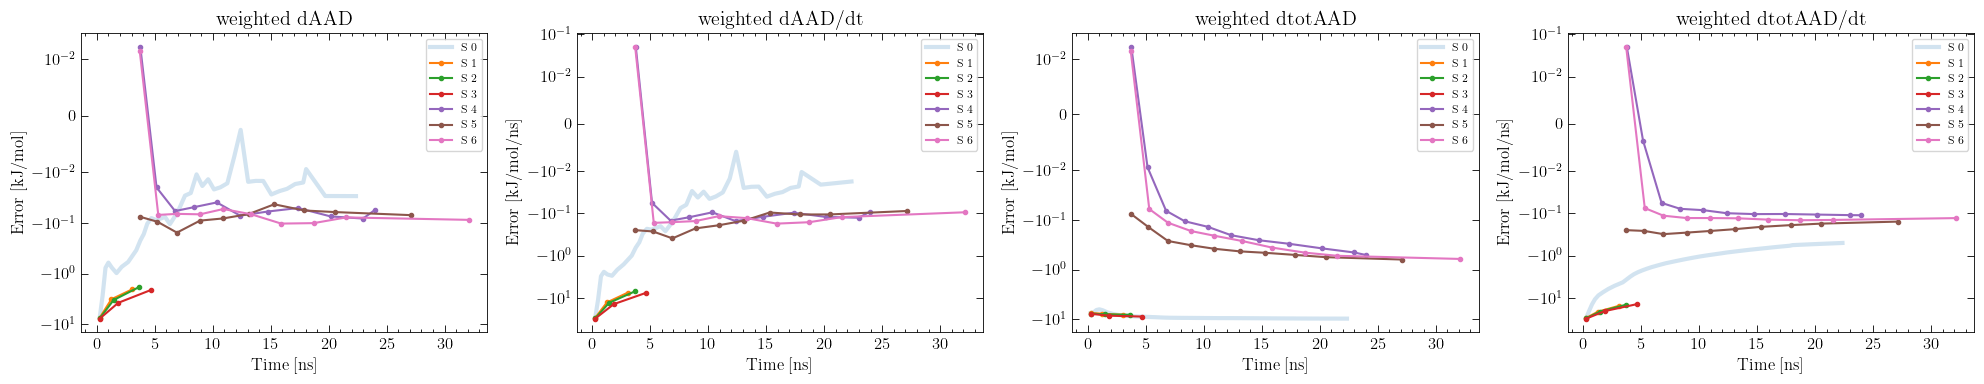

In [ ]:
# plot d_error dAAD_weighted all ["weighted dAAD", "weighted dAAD/dt", "weighted dtotAAD", "weighted dtotAAD/dt"]
title_list = ["weighted dAAD", "weighted dAAD/dt", "weighted dtotAAD", "weighted dtotAAD/dt"]
y_label_list = ["Error [kJ/mol]", "Error [kJ/mol/ns]", "Error [kJ/mol]", "Error [kJ/mol/ns]"]
plt.figure(figsize=(20,4))

for sim in range(len(mfi_PRTR.sim)):
    
    if len(np.array(mfi_PRTR.sim[sim].Avr_Error_list)[:,0]) < 2: print(f"SIM {sim} : len_err={len(np.array(mfi_PRTR.sim[sim].Avr_Error_list)[:,0])}"); continue

    for err_type in range(4):
        
        plt.subplot(1,4,err_type+1)
        plt.title(title_list[err_type]); plt.xlabel("Time [ns]"); plt.ylabel(y_label_list[err_type])
    
        if sim == 0: plt.plot(np.array(mfi_PRTR.sim[sim].Avr_Error_list)[1:,0], np.array(mfi_PRTR.sim[sim].d_AAD_w)[:, err_type], label=f"S {sim}", linewidth=3, alpha=0.2)
        else: 
            t = np.array(mfi_PRTR.sim[sim].Avr_Error_list)[1:,0]
            t = [t[0] + (t[i] - t[0])*4 for i in range(len(t))]
            plt.plot(t , np.array(mfi_PRTR.sim[sim].d_AAD_w)[:, err_type] , label=f"S {sim}", marker=".")
            
            # plt.ylim(-1,1)
            plt.yscale("symlog", linthresh=0.01)
 
        plt.legend(fontsize=8)

plt.tight_layout(); plt.show()

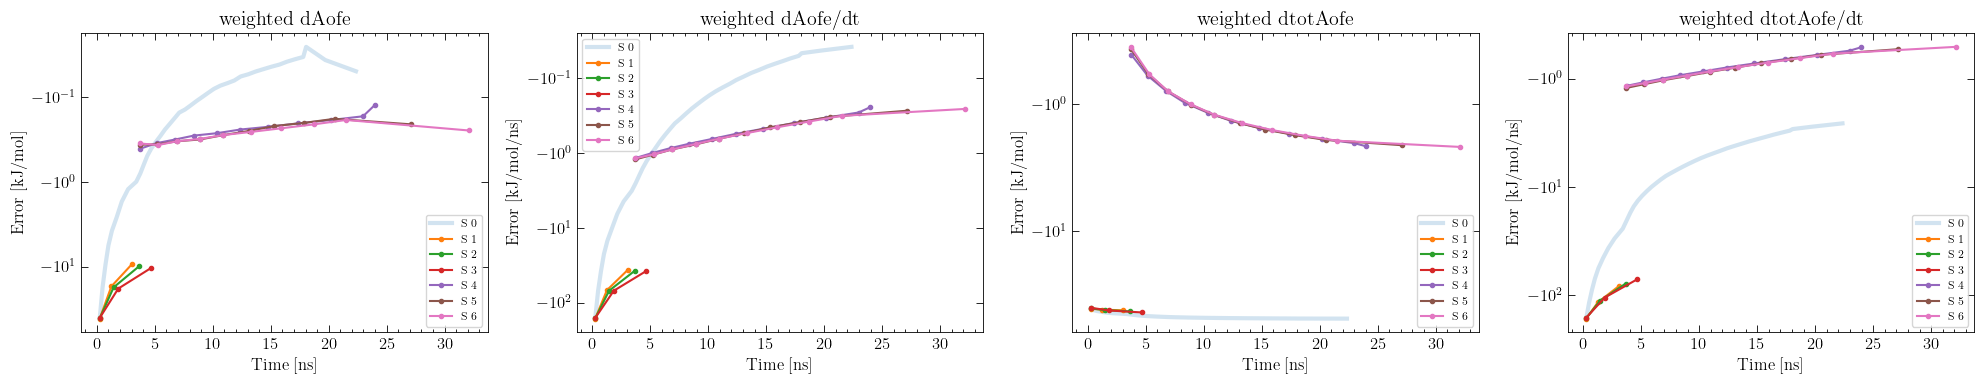

In [ ]:
title_list = ["weighted dAofe", "weighted dAofe/dt", "weighted dtotAofe", "weighted dtotAofe/dt"]
y_label_list = ["Error [kJ/mol]", "Error [kJ/mol/ns]", "Error [kJ/mol]", "Error [kJ/mol/ns]"]
plt.figure(figsize=(20,4))

for sim in range(len(mfi_PRTR.sim)):
    
    if len(np.array(mfi_PRTR.sim[sim].Avr_Error_list)[:,0]) < 2: print(f"SIM {sim} : len_err={len(np.array(mfi_PRTR.sim[sim].Avr_Error_list)[:,0])}"); continue

    for err_type in range(4):
        
        plt.subplot(1,4,err_type+1)
        plt.title(title_list[err_type]); plt.xlabel("Time [ns]"); plt.ylabel(y_label_list[err_type])
    
        if sim == 0: plt.plot(np.array(mfi_PRTR.sim[sim].Avr_Error_list)[1:,0], np.array(mfi_PRTR.sim[sim].d_Aofe_w)[:, err_type] , label=f"S {sim}", linewidth=3, alpha=0.2)
        else: 
            t = np.array(mfi_PRTR.sim[sim].Avr_Error_list)[1:,0]
            t = [t[0] + (t[i] - t[0])*4 for i in range(len(t))]
            plt.plot(t , np.array(mfi_PRTR.sim[sim].d_Aofe_w)[:, err_type] , label=f"S {sim}", marker=".")
            
            plt.yscale("symlog", linthresh=0.01)
 
        plt.legend(fontsize=8)

plt.tight_layout(); plt.show()

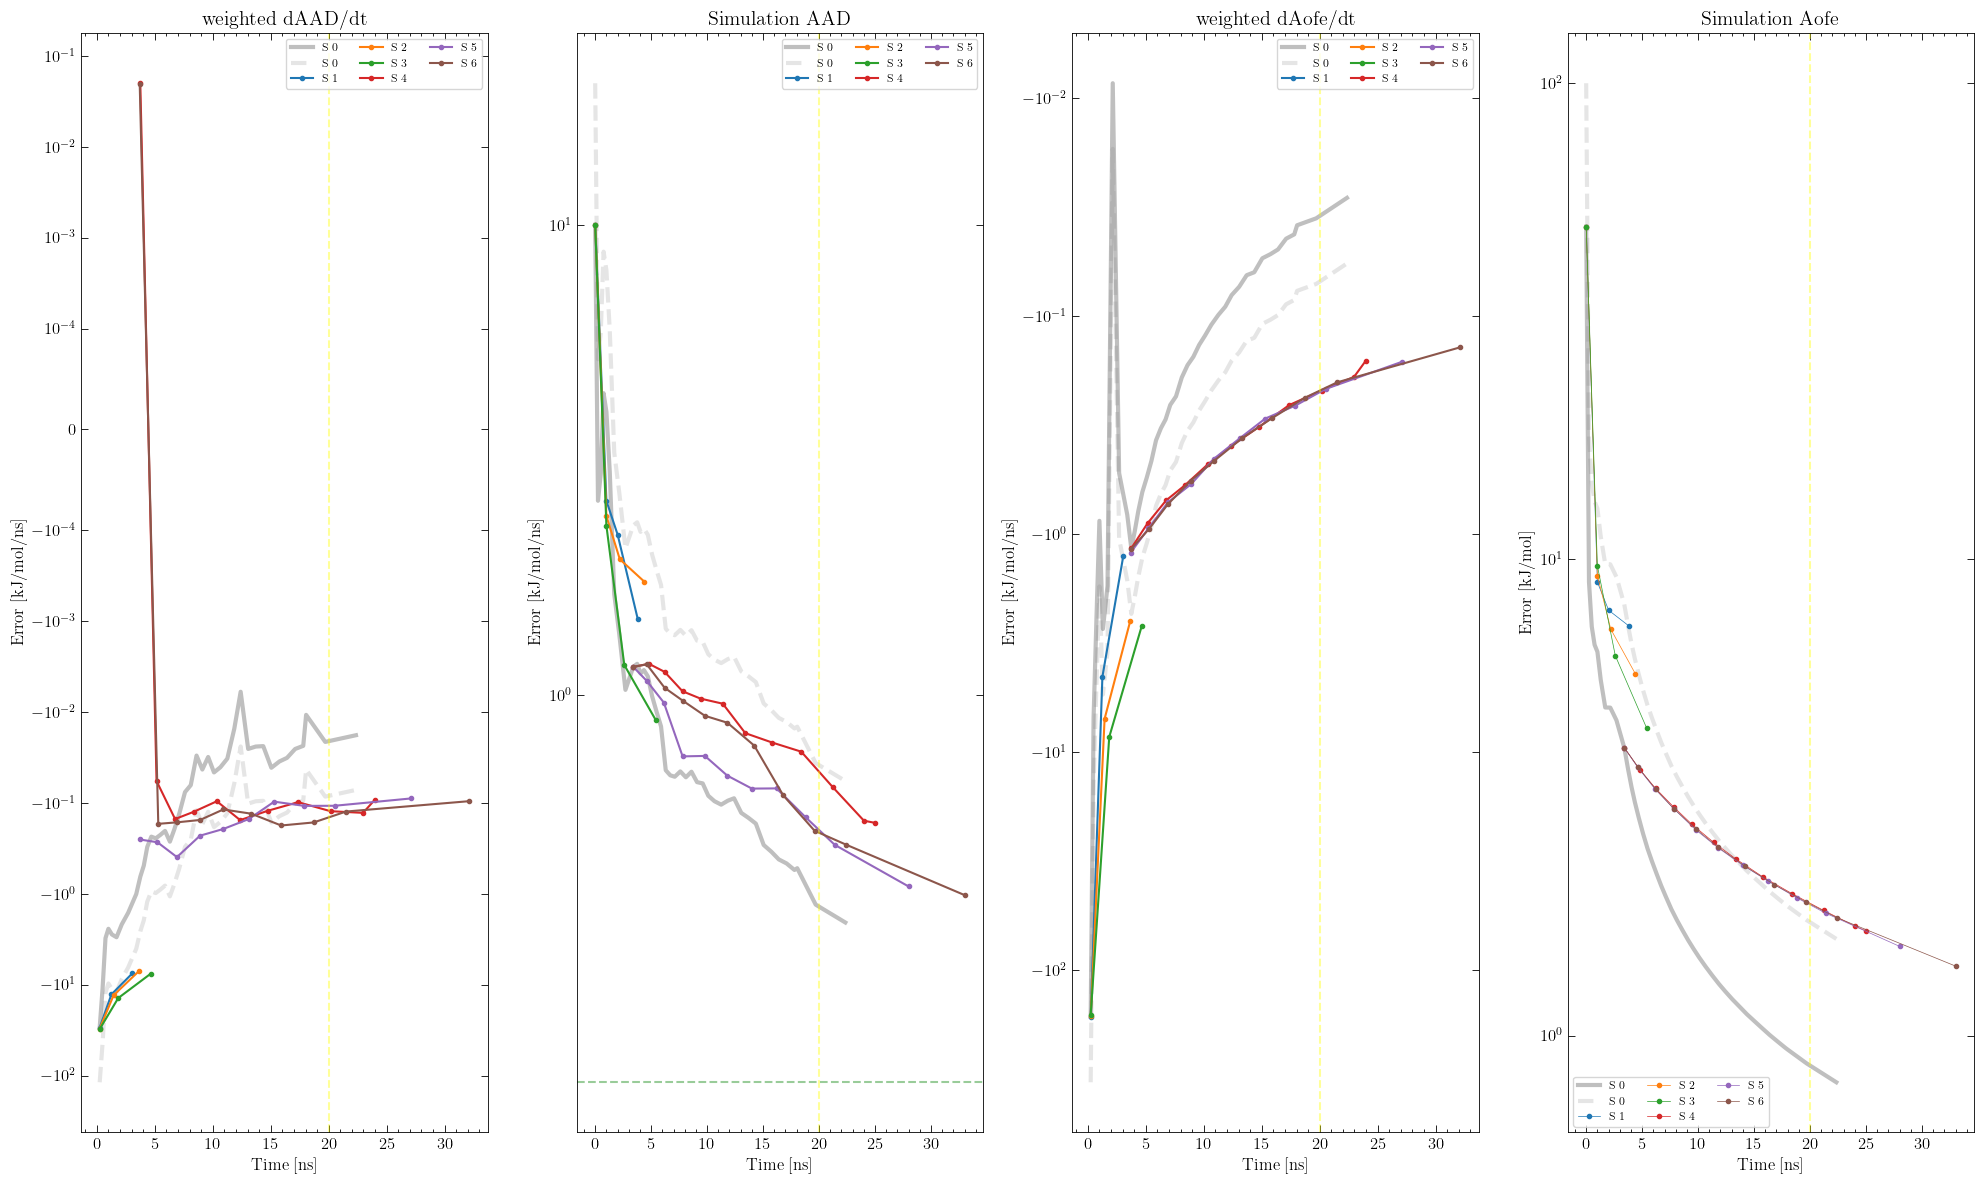

In [ ]:
### Mega plot with [d_AAD_w, AAD, d_Aofe_w, Aofe]

plt.figure(figsize=(20,12))
time_selection = 1 #/4
sim_limit = len(mfi_PRTR.sim)
if time_selection < 1: ts = int(len(mfi_PRTR.sim[0].Avr_Error_list)// (1/time_selection))
else: ts = len(mfi_PRTR.sim[0].Avr_Error_list)
t = np.array(mfi_PRTR.sim[0].Avr_Error_list)[:,0]
t_dt = np.array(mfi_PRTR.sim[0].Avr_Error_list)[1:,0]

plt.subplot(1,4,1)
plt.plot(t_dt[:ts], np.array(mfi_PRTR.sim[0].d_AAD_w)[:, 1][:ts] , label=f"S {0}", color="grey", linewidth=3, alpha=0.5)
plt.plot(t_dt[:ts], 4 * np.array(mfi_PRTR.sim[0].d_AAD_w)[:, 1][:ts] , label=f"S {0}", color="grey", linewidth=3, alpha=0.2, linestyle="--")
for sim in range(1,len(mfi_PRTR.sim))[:sim_limit]:
    if len(np.array(mfi_PRTR.sim[sim].Avr_Error_list)[:,0]) < 2: continue
    t_sim = np.array(mfi_PRTR.sim[sim].Avr_Error_list)[1:,0];   t_sim = [t_sim[0] + (t_sim[i] - t_sim[0])*4 for i in range(len(t_sim))]
    plt.plot(t_sim , np.array(mfi_PRTR.sim[sim].d_AAD_w)[:, 1] , label=f"S {sim}", marker=".")
    
plt.yscale("symlog", linthresh=0.0001)
plt.axvline(MFI.guaranteed_sim_time*4, color="yellow", linestyle="--", alpha=0.4)
plt.legend(fontsize=8, ncol=3); plt.title("weighted dAAD/dt"); plt.xlabel("Time [ns]"); plt.ylabel("Error [kJ/mol/ns]")


plt.subplot(1,4,2)
plt.plot(t, np.array(mfi_PRTR.sim[0].Avr_Error_list)[:, 3][:ts] , label=f"S {0}", color="grey", linewidth=3, alpha=0.5)
plt.plot(t[:ts], 2 * np.array(mfi_PRTR.sim[0].Avr_Error_list)[:, 3][:ts] , label=f"S {0}", color="grey", linewidth=3, alpha=0.2, linestyle="--")
for sim in range(1,len(mfi_PRTR.sim))[:sim_limit]:
    if len(np.array(mfi_PRTR.sim[sim].Avr_Error_list)[:,0]) < 2: continue
    t_sim = np.array(mfi_PRTR.sim[sim].Avr_Error_list)[:,0]; t_sim = [t_sim[0] + (t_sim[i] - t_sim[0])*4 for i in range(len(t_sim))]
    plt.plot(t_sim , np.array(mfi_PRTR.sim[sim].Avr_Error_list)[:, 3] , label=f"S {sim}", marker=".")
    
plt.yscale("symlog", linthresh=0.0001)
plt.axvline(MFI.guaranteed_sim_time*4, color="yellow", linestyle="--", alpha=0.4)
plt.axhline(mfi_PRTR.goal, color="green", linestyle="--", alpha=0.4)
plt.legend(fontsize=8, ncol=3); plt.title("Simulation AAD"); plt.xlabel("Time [ns]"); plt.ylabel("Error [kJ/mol/ns]")

plt.subplot(1,4,3)
plt.plot(t_dt[:ts], np.array(mfi_PRTR.sim[0].d_Aofe)[:, 1][:ts] , label=f"S {0}", color="grey", linewidth=3, alpha=0.5)
plt.plot(t_dt[:ts], 2 * np.array(mfi_PRTR.sim[0].d_Aofe)[:, 1][:ts] , label=f"S {0}", color="grey", linewidth=3, alpha=0.2, linestyle="--")
for sim in range(1,len(mfi_PRTR.sim))[:sim_limit]:
    if len(np.array(mfi_PRTR.sim[sim].Avr_Error_list)[:,0]) < 2: continue
    t_sim = np.array(mfi_PRTR.sim[sim].Avr_Error_list)[1:,0];   t_sim = [t_sim[0] + (t_sim[i] - t_sim[0])*4 for i in range(len(t_sim))]
    plt.plot(t_sim , np.array(mfi_PRTR.sim[sim].d_Aofe)[:, 1] , label=f"S {sim}", marker=".")
        
plt.yscale("symlog", linthresh=0.0001)
plt.axvline(MFI.guaranteed_sim_time*4, color="yellow", linestyle="--", alpha=0.4)
plt.legend(fontsize=8, ncol=3); plt.title("weighted dAofe/dt"); plt.xlabel("Time [ns]"); plt.ylabel("Error [kJ/mol/ns]")


plt.subplot(1,4,4)
plt.plot(t[:ts], np.array(mfi_PRTR.sim[0].Avr_Error_list)[:, 2][:ts] , label=f"S {0}", color="grey", linewidth=3, alpha=0.5)
plt.plot(t[:ts], 2 * np.array(mfi_PRTR.sim[0].Avr_Error_list)[:, 2][:ts] , label=f"S {0}", color="grey", linewidth=3, alpha=0.2, linestyle="--")
for sim in range(1,len(mfi_PRTR.sim))[:sim_limit]:
    if len(np.array(mfi_PRTR.sim[sim].Avr_Error_list)[:,0]) < 2: continue
    t_sim = np.array(mfi_PRTR.sim[sim].Avr_Error_list)[:,0]; t_sim = [t_sim[0] + (t_sim[i] - t_sim[0])*4 for i in range(len(t_sim))]
    plt.plot(t_sim , np.array(mfi_PRTR.sim[sim].Avr_Error_list)[:, 2] , label=f"S {sim}", marker=".", linewidth=0.5)
    
plt.yscale("symlog", linthresh=0.0001)
plt.axvline(MFI.guaranteed_sim_time*4, color="yellow", linestyle="--", alpha=0.4)
plt.legend(fontsize=8, ncol=3); plt.title("Simulation Aofe"); plt.xlabel("Time [ns]"); plt.ylabel("Error [kJ/mol]")

plt.tight_layout(); plt.show()

## Alanine Dipeptide

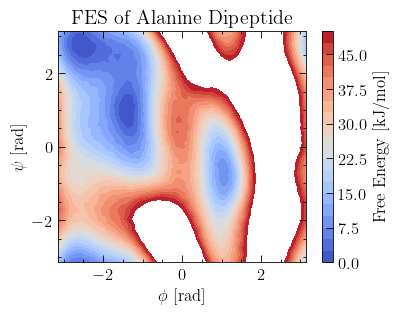

In [6]:
### Define the grid, and load a reference FES
grid = np.linspace(-np.pi, np.pi, 101); 
X, Y = np.meshgrid(grid, grid)
[plX, plY, pl_min, pl_max, pl_n, pl_extra] = lib2.get_plumed_grid_2D(X, Y, periodic=[True, True])

path_AP = path_data + "Alanine_Dipeptide/"
path_input = path_notebook + "/gmx_files/Alanine_Dipeptide/"
plumed_dat_text = f"MOLINFO STRUCTURE={path_input}reference.pdb\nphi: TORSION ATOMS=@phi-2\npsi: TORSION ATOMS=@psi-2\n"

_, _, AP_ref = lib2.load_pkl(path_input + "AP_ref_101x101.pkl")
plt.contourf(X, Y, AP_ref, levels=np.linspace(0, 50, 21), cmap='coolwarm'); plt.colorbar(label="Free Energy [kJ/mol]"); plt.xlabel("$\phi$ [rad]"); plt.ylabel("$\psi$ [rad]"); plt.title("FES of Alanine Dipeptide"); plt.show()

t_compare, v_compare, aofe_compare, aad_compare = lib2.load_pkl(path_input+"AP_10ns_t_v_aofe_aad_prog.pkl")


In [7]:
# default parameters for the MFI class
default_params = {	"X":X, "Y":Y, "Z":AP_ref, "plX":plX, "plY":plY, "periodic":[True, True], "System":"gromacs", "cv_name":["phi","psi"], "plumed_dat_text":plumed_dat_text,
                    "kT":2.49, "time_step":0.001, "position_pace":10, "n_pos_per_window":10, "metad_pace":100, "bw":[0.1, 0.1],
         			"len_error_list":50, "FES_cutoff":50.0, # "record_maps":True, "record_forces_e":True, "calculate_FES_st_dev":True, "bootstrap_iter":50,
                    "simulation_folder_path": path_AP, "save_mfi_instance":True, "save_results":True, "save_force_terms":True, "save_error_progression":True,
				  	
                    "find_sim_init_structure":True, "make_tpr_input_file":True, 
					"trajectory_xtc_file_path_list":[path_input+"traj_0.xtc"], "structure_gro_file_path":path_input+"structure.gro", "mdp_file_path":path_input+"gromppvac.mdp", "top_file_path":path_input+"topology.top", "tpr_file_path":path_input+"input.tpr", "pdb_file_path":path_input+"reference.pdb",
           			}



In [8]:
os.chdir(path_notebook); reload(MFI_class2D); reload(lib2); pass

In [10]:
MFI = MFI_class2D.MFI2D(**default_params)

mfi_PRTR = MFI.MFI_parallel_RTR(parent=MFI, ID="_test2", workers=3, n_cores_per_simulation=1, goal=0.1, main_error_type="AAD", n_pos_before_analysis=1000, guaranteed_sim_time=0.2, max_sim_time=0.5,
                         time_budget=1)
                        #  restart_PRTR=True, time_budget=3.7)
                        
mfi_PRTR.run()

mfi_PRTR.sim[0].plot_results(t_compare=t_compare, aofe_compare=aofe_compare, aad_compare=aad_compare)

print(f"\n~~~~~~ END ~~~~~~\n\n{mfi_PRTR.sim[0].Aofe = :.4f}, {mfi_PRTR.sim[0].AAD = :.4f}")


S 1  START in exploration phase | MetaD_H=19.9 | MetaD_W=[0.100528 0.100528] | BF=50.0 | Startup: 0.55 sec
S 2  START in exploration phase | MetaD_H=19.9 | MetaD_W=[0.12566 0.12566] | BF=50.0 | Startup: 0.54 sec
S 3  START in exploration phase | MetaD_H=19.9 | MetaD_W=[0.150792 0.150792] | BF=50.0 | Startup: 0.57 sec
    S 1 | t= 0.01ns | nPos: 1000/ 1000: Aofe: 37.05 | AAD: 7.97 | Aofe_all: 37.05  |  AAD_all: 7.97 | 
ALL | t= 0.01ns :   ->->->-> Memory: 25.31 MB

    S 2 | t= 0.01ns | nPos: 1000/ 1000: Aofe: 42.85 | AAD: 10.39 | Aofe_all: 37.02  |  AAD_all: 10.44 | 
ALL | t= 0.02ns :   ->->->-> Memory: 27.39 MB

    S 3 | t= 0.01ns | nPos: 1000/ 1000: Aofe: 46.40 | AAD: 10.69 | Aofe_all: 36.54  |  AAD_all: 13.52 | 
ALL | t= 0.03ns :   ->->->-> Memory: 29.48 MB

    S 1 | t= 0.02ns | nPos: 1000/ 2000: Aofe: 29.81 | AAD: 7.28 | Aofe_all: 33.28  |  AAD_all: 10.75 | 
ALL | t= 0.04ns :   ->->->-> Memory: 30.16 MB

    S 2 | t= 0.02ns | nPos: 1000/ 2000: Aofe: 34.10 | AAD: 8.76 | Aofe_all: 

KeyboardInterrupt: 

## Run over night

In [ ]:
# default parameters for the MFI class
default_params = {  "X":X, "Y":Y, "Z":inve_pot, "bw":[0.1, 0.1], "System":"Langevin", "plumed_dat_text":plumed_dat_text, "plX":plX, "plY":plY, 
                    "position_pace":50, "n_pos_per_window":10, "metad_pace":500, "Bias_sf":1, "gaus_filter_sigma":1,
                    "FES_cutoff":FES_cutoff, "calculate_FES_st_dev":True, "bootstrap_iter":30, "simulation_folder_path": path_invernizzi}

PRTR_params = { "workers":3, 
               "goal":0.01, "main_error_type":"AAD", "n_pos_before_analysis":1000, "guaranteed_sim_time":10, "max_sim_time":20, "time_budget":100, "ID":""}               
                  

In [46]:
total_campaigns = 20

for n_campaign in range(1,total_campaigns+1):
        
    campaign_id = f"_{n_campaign}_100ns"
    print(f"\n\n-------- {n_campaign = }, with {campaign_id = }", end=" ")
    
    if os.path.isfile(path_invernizzi+f"PRTRcampaing{campaign_id}/error_progression{campaign_id}.pkl"): print("Results file exists, skipping campaign"); continue
    else: print("--------")
        
    # new_params = {**default_params.copy()}
    # new_params.update({"simulation_folder_path":path_PRTR+f"simulation{campaign_id}/"})    
    MFI = MFI_class2D.MFI2D(**default_params)
    
    mfi_PRTR = MFI.MFI_parallel_RTR(parent=MFI, **PRTR_params)       
    
    mfi_PRTR.run()

    print(f"\n\n~~~~ End of campaign: \nAofe = {mfi_PRTR.sim[0].Aofe:.4f}, AAD = {mfi_PRTR.sim[0].AAD:.4f}")

    lib2.save_pkl([mfi_PRTR.sim[0].force_terms, mfi_PRTR.sim[0].Avr_Error_list], path_PRTR+f"results_20ns{campaign_id}")




n_campaign = 1, with campaign_id = '_inve2_PRTR_1'
Results file exists, skipping campaign


n_campaign = 2, with campaign_id = '_inve2_PRTR_2'
Results file exists, skipping campaign


n_campaign = 3, with campaign_id = '_inve2_PRTR_3'
Results file exists, skipping campaign


n_campaign = 4, with campaign_id = '_inve2_PRTR_4'
Results file exists, skipping campaign


n_campaign = 5, with campaign_id = '_inve2_PRTR_5'
Results file exists, skipping campaign


n_campaign = 6, with campaign_id = '_inve2_PRTR_6'
Results file exists, skipping campaign


n_campaign = 7, with campaign_id = '_inve2_PRTR_7'
Results file exists, skipping campaign


n_campaign = 8, with campaign_id = '_inve2_PRTR_8'
Results file exists, skipping campaign


n_campaign = 9, with campaign_id = '_inve2_PRTR_9'
Results file exists, skipping campaign


n_campaign = 10, with campaign_id = '_inve2_PRTR_10'
Results file exists, skipping campaign


n_campaign = 11, with campaign_id = '_inve2_PRTR_11'
Results file exists, sk

### Run all surfaces X times


In [5]:
reload(MFI_class2D); reload(lib2); 

In [2]:

grid = np.linspace(-3, 3, 100); 
X, Y = np.meshgrid(grid, grid)
[plX, plY, pl_min, pl_max, pl_n, pl_extra] = lib2.get_plumed_grid_2D(X, Y, [-4,-4], [4,4])

inve_pot = 1.34549*X**4+1.90211*X**3*Y+3.92705*X**2*Y**2-6.44246*X**2-1.90211*X*Y**3+5.58721*X*Y+1.33481*X+1.34549*Y**4-5.55754*Y**2+0.904586*Y+18.5598
inve_pot = inve_pot - np.min(inve_pot)
inve_pot_string = "1.34549*x^4+1.90211*x^3*y+3.92705*x^2*y^2-6.44246*x^2-1.90211*x*y^3+5.58721*x*y+1.33481*x+1.34549*y^4-5.55754*y^2+0.904586*y+18.5598"
plumed_dat_text_inve = f"p: DISTANCE ATOMS=1,2 COMPONENTS\nff: MATHEVAL ARG=p.x,p.y FUNC=({inve_pot_string}) PERIODIC=NO\nbb: BIASVALUE ARG=ff\n"
path_inve = path_data + "Invernizzi_Potential/"
sim_var_inve = 1_000_000, 0.186, 1, 10, 20

pot1 = 3.9*X**4 + 3.9*Y**4 - 19.2*X**2 - 19.2*Y**2 + 5.7*X**3*Y - 5.7*X*Y**3 + 12*X**2*Y**2 - 6*X*Y + 2.7*Y + 3.6*X
pot1 = pot1 - np.min(pot1)
pot1_string = "3.9*x^4+3.9*y^4-19.2*x^2-19.2*y^2+5.7*x^3*y-5.7*x*y^3+12*x^2*y^2-6*x*y+2.7*y+3.6*x"
plumed_dat_text_pot1 = f"p: DISTANCE ATOMS=1,2 COMPONENTS\nff: MATHEVAL ARG=p.x,p.y FUNC=({pot1_string}) PERIODIC=NO\nbb: BIASVALUE ARG=ff\n"
path_pot1 = path_data + "pot1/"
sim_var_pot1 = 1_500_000, 0.1, 2, 20, 40

pot2 = 1.84*X**6 + 1.84*Y**6 - 11.5*X**4 - 11.5*Y**4 + 17.94*X**2 + 17.94*Y**2 - 2.3*X**5*Y + 2.3*X*Y**5 - 3.7*X**3*Y + 3.7*X*Y**3 + 20*X**2*Y**2 + 2.1*X**2 + 2.1*Y**2 + X**2*Y + X*Y**2 + 24.70075155
pot2 = pot2 - np.min(pot2)
pot2_string = "1.84*x^6+1.84*y^6-11.5*x^4-11.5*y^4+17.94*x^2+17.94*y^2-2.3*x^5*y+2.3*x*y^5-3.7*x^3*y+3.7*x*y^3+20*x^2*y^2+2.1*x^2+2.1*y^2+x^2*y+x*y^2+24.70075155"
plumed_dat_text_pot2 = f"p: DISTANCE ATOMS=1,2 COMPONENTS\nff: MATHEVAL ARG=p.x,p.y FUNC=({pot2_string}) PERIODIC=NO\nbb: BIASVALUE ARG=ff\n"
path_pot2 = path_data + "pot2/"
sim_var_pot2 = 3_000_000, 0.1, 2, 20, 40

pot3 = np.exp(X-2)**5 + np.exp(-X-2)**5 + np.exp(Y-2)**5 + np.exp(-Y-2)**5 + 13*np.sin(2*X*Y) + 17*np.sin(2*Y) + 0.137*X**4*Y**4
pot3 = pot3 - np.min(pot3)
pot3_string = "exp(x-2)^5+exp(-x-2)^5+exp(y-2)^5+exp(-y-2)^5+13*sin(2*x*y)+17*sin(2*y)+0.137*x^4*y^4"
plumed_dat_text_pot3 = f"p: DISTANCE ATOMS=1,2 COMPONENTS\nff: MATHEVAL ARG=p.x,p.y FUNC=({pot3_string}) PERIODIC=NO\nbb: BIASVALUE ARG=ff\n"
path_pot3 = path_data + "pot3/"
sim_var_pot3 = 3_000_000, 0.1, 2, 20, 40

pot_list = [inve_pot, pot1, pot2, pot3]
pot_string_list = [inve_pot_string, pot1_string, pot2_string, pot3_string]
plumed_dat_text_list = [plumed_dat_text_inve, plumed_dat_text_pot1, plumed_dat_text_pot2, plumed_dat_text_pot3]
path_list = [path_inve, path_pot1, path_pot2, path_pot3]
sim_var_list = [sim_var_inve, sim_var_pot1, sim_var_pot2, sim_var_pot3]

# default parameters for the MFI class
# default parameters for the MFI class
default_params = {  "X":X, "Y":Y, "Z":inve_pot, "bw":[0.1, 0.1], #"dZ_dX":dinve_pot_dx, "dZ_dY":dinve_pot_dy,
                    "System":"Langevin", "plumed_dat_text":plumed_dat_text_inve, "plX":plX, "plY":plY, "simulation_steps":1_000_000, 
                    "position_pace":20, "n_pos_per_window":10, "metad_pace":200, 
                    "metad_width":None, "metad_height":None, "biasfactor":None,
                    "Bias_sf":1.02, "gaus_filter_sigma":2,
                    "len_error_list":100, "FES_cutoff":20, "bootstrap_iter":20, "save_error_progression":True,
                    "simulation_folder_path": path_inve, "print_info": False}

# PRTR_params = { "goal":0.01, "main_error_type":"AAD", "n_pos_before_analysis":1000, "guaranteed_sim_time":3/4, "max_sim_time":5/4, "time_budget":5, "reset_forces_after":"Exploration", "ID":""}

In [19]:

for n_campaign in range(1,101):
# for n_campaign in range(1,4):
    
    for n_pot in range(4):
    # for n_pot in [2]:
        
        sim_var = sim_var_list[n_pot]
        tb = sim_var[0] / 200_000
        path_surf = path_list[n_pot]

        campaign_id = f"_{n_campaign}_{int(tb)}ns"
        path_campaign = path_surf + f"PRTRcampaign{campaign_id}/"
        if not os.path.isdir(path_campaign): os.mkdir(path_campaign)
        os.chdir(path_campaign)
        # print(f"\n--- {n_campaign = }, Surf: {n_pot}", end=" ")

    
        if os.path.isfile(path_campaign+f"error_progression{campaign_id}.pkl"): 
            error = lib2.load_pkl(path_campaign+f"error_progression{campaign_id}.pkl")
            if error[3][-1] > 3: print(f"S{n_pot}: {n_campaign = }, AAD={error[3][-1]:.4f}, {error.shape = }");
            # print(f"~~~ Results exists: Aofe={error[2,-1]:.4f}, AAD={error[3, -1]:.4f}, ABS={error[4,-1]:.4f}")
            continue
        else: print("--------")
        
        new_params = default_params.copy()
        new_params.update({"ID":campaign_id, "Z":pot_list[n_pot], "plumed_dat_text":plumed_dat_text_list[n_pot], 
                           "simulation_folder_path": path_surf, "FES_cutoff":sim_var[4]})
        # new_prtr_params = PRTR_params.copy()

        MFI = MFI_class2D.MFI2D(**new_params)        
        
        try:
            mfi_PRTR = MFI.MFI_parallel_RTR(parent=MFI, ID=campaign_id, workers=4, workers_exploration=1, reset_forces_after="Exploration", 
                                            goal=0.01, main_error_type="AAD", n_pos_before_analysis=1000, 
                                            guaranteed_sim_time=int(np.ceil(tb/2))/4, max_sim_time=tb/4, time_budget=tb, save_comp_cost=True, dynamic_print="off")
            mfi_PRTR.run()
            print(f"~~~ End of campaign: Aofe={mfi_PRTR.sim[0].Aofe:.4f}, AAD={mfi_PRTR.sim[0].AAD:.4f}, ABS={mfi_PRTR.sim[0].ABS_error:.4f}")
        
        except: print(f"\n~~~~~~~~~~~~ Error in campaign (needs to be repeated) ~~~~~~~~~~~~\n\n\n")

        

S2: n_campaign = 2, AAD=3.9127, error.shape = (5, 17)
S2: n_campaign = 3, AAD=3.3778, error.shape = (5, 19)
S2: n_campaign = 4, AAD=4.5368, error.shape = (5, 18)
S2: n_campaign = 5, AAD=4.4618, error.shape = (5, 18)
S2: n_campaign = 7, AAD=3.5200, error.shape = (5, 18)
S2: n_campaign = 8, AAD=5.0547, error.shape = (5, 22)
S2: n_campaign = 9, AAD=3.9312, error.shape = (5, 18)
S2: n_campaign = 10, AAD=3.4252, error.shape = (5, 18)
S2: n_campaign = 12, AAD=3.2620, error.shape = (5, 18)
S2: n_campaign = 13, AAD=3.1818, error.shape = (5, 18)
S2: n_campaign = 14, AAD=3.3310, error.shape = (5, 18)
S2: n_campaign = 16, AAD=3.2139, error.shape = (5, 18)
S2: n_campaign = 17, AAD=3.4988, error.shape = (5, 18)
S2: n_campaign = 18, AAD=5.3312, error.shape = (5, 21)
S2: n_campaign = 19, AAD=3.2179, error.shape = (5, 19)
S2: n_campaign = 20, AAD=3.9053, error.shape = (5, 17)
S2: n_campaign = 21, AAD=4.0310, error.shape = (5, 23)
S2: n_campaign = 23, AAD=4.4200, error.shape = (5, 17)
S2: n_campaign = 

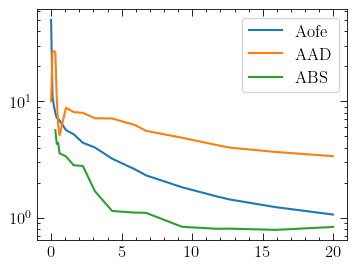

In [15]:
plt.plot(error[0], error[2], label="Aofe")
plt.plot(error[0], error[3], label="AAD")
plt.plot(error[0], error[4], label="ABS")
plt.legend()
plt.yscale("log")
plt.show()